# General Enviorment setting

In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.9).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!git clone https://github.com/jamaalhsargana/SWaT_Stages.git

Cloning into 'SWaT_Stages'...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

Mounted at /content/drive


In [ ]:

#url = 'https://drive.google.com/file/d/1f3scLUz_deADq3NljX6gI9kO3vce0ldl/view?usp=sharing'
#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#df = pd.read_csv(path)
#df.head()

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#1st dataset
#https://drive.google.com/file/d/15Ua-0tI5eGSkBLQ5mbWMUwMa9ffSYtFp/view?usp=sharing
#https://drive.google.com/file/d/15Ua-0tI5eGSkBLQ5mbWMUwMa9ffSYtFp/view?usp=share_link
#https://drive.google.com/file/d/1f3scLUz_deADq3NljX6gI9kO3vce0ldl/view?usp=sharing
#https://drive.google.com/file/d/1fVwSPwJLxN0W44oiBEbwq5SzCBNxENX0/view?usp=sharing
#https://drive.google.com/file/d/1fVwSPwJLxN0W44oiBEbwq5SzCBNxENX0/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1fVwSPwJLxN0W44oiBEbwq5SzCBNxENX0'})
fileDownloaded.GetContentFile('swat_dataset_2015-1.csv')

#2nd dataset
#https://drive.google.com/file/d/12C2ZMTAI7bEFFj9y3w9KDRQU5j00yO4X/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'12C2ZMTAI7bEFFj9y3w9KDRQU5j00yO4X'})
fileDownloaded.GetContentFile('swat_dataset_2015-1-s.csv')


# Attacked-Normal detection

In [ ]:
# Creating initial datafram to load data

df = pd.read_csv('swat_dataset_2015-1.csv',delimiter=',' )
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Attacked
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
# Changing the Attacked column to 0 & 1


detect = {'Normal': 0, 'Attack': 1}
df['Attacked'] = df['Attacked'].map(detect)

#df.Attacked.map(dict(Attack=1, Normal=0))
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Attacked
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0


In [ ]:
#df datafram is used for the classification of Attacked and Normal records

df['Attacked'].value_counts()

0    395298
1     54621
Name: Attacked, dtype: int64

Making 2 different dataframs containing attacked records and normal records

df_attack & df_norm


Since we had class difference for the Attacked and Normal records in **df** we had to split the data into 2 different datafram.

However for detecting the stage of the attacked record we cannot split the data as there are 6 different classes for the stage detection process.

In [ ]:
df_attack = df.loc[df['Attacked'] == 1]
df_attack.shape

(54621, 53)

In [ ]:
df_norm = df.loc[df['Attacked'] == 0]
df_norm.shape

(395298, 53)

In [ ]:
df.corr()['Attacked']

<ipython-input-8-b4b2d4dbfb5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Attacked']


FIT101     -0.288920
LIT101      0.357170
 MV101     -0.276528
P101       -0.340154
P102        0.217119
 AIT201    -0.085324
AIT202      0.056818
AIT203      0.376254
FIT201     -0.333393
 MV201     -0.323838
 P201      -0.122543
 P202            NaN
P203       -0.340621
 P204       0.030015
P205       -0.338490
P206        0.029746
DPIT301    -0.356127
FIT301     -0.430304
LIT301      0.253358
MV301       0.015984
MV302      -0.377637
 MV303     -0.014865
MV304       0.609133
P301             NaN
P302       -0.421818
AIT401      0.098597
AIT402      0.737683
FIT401     -0.763314
LIT401     -0.670578
P401             NaN
P402       -0.743164
P403       -0.004293
P404             NaN
UV401      -0.758003
AIT501     -0.577902
AIT502      0.707564
AIT503      0.102062
AIT504      0.099059
FIT501     -0.753403
FIT502     -0.752143
FIT503     -0.758781
FIT504     -0.761722
P501       -0.757980
P502             NaN
PIT501     -0.755207
PIT502     -0.495360
PIT503     -0.753205
FIT601     -0

<ipython-input-9-94c787de1d39>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


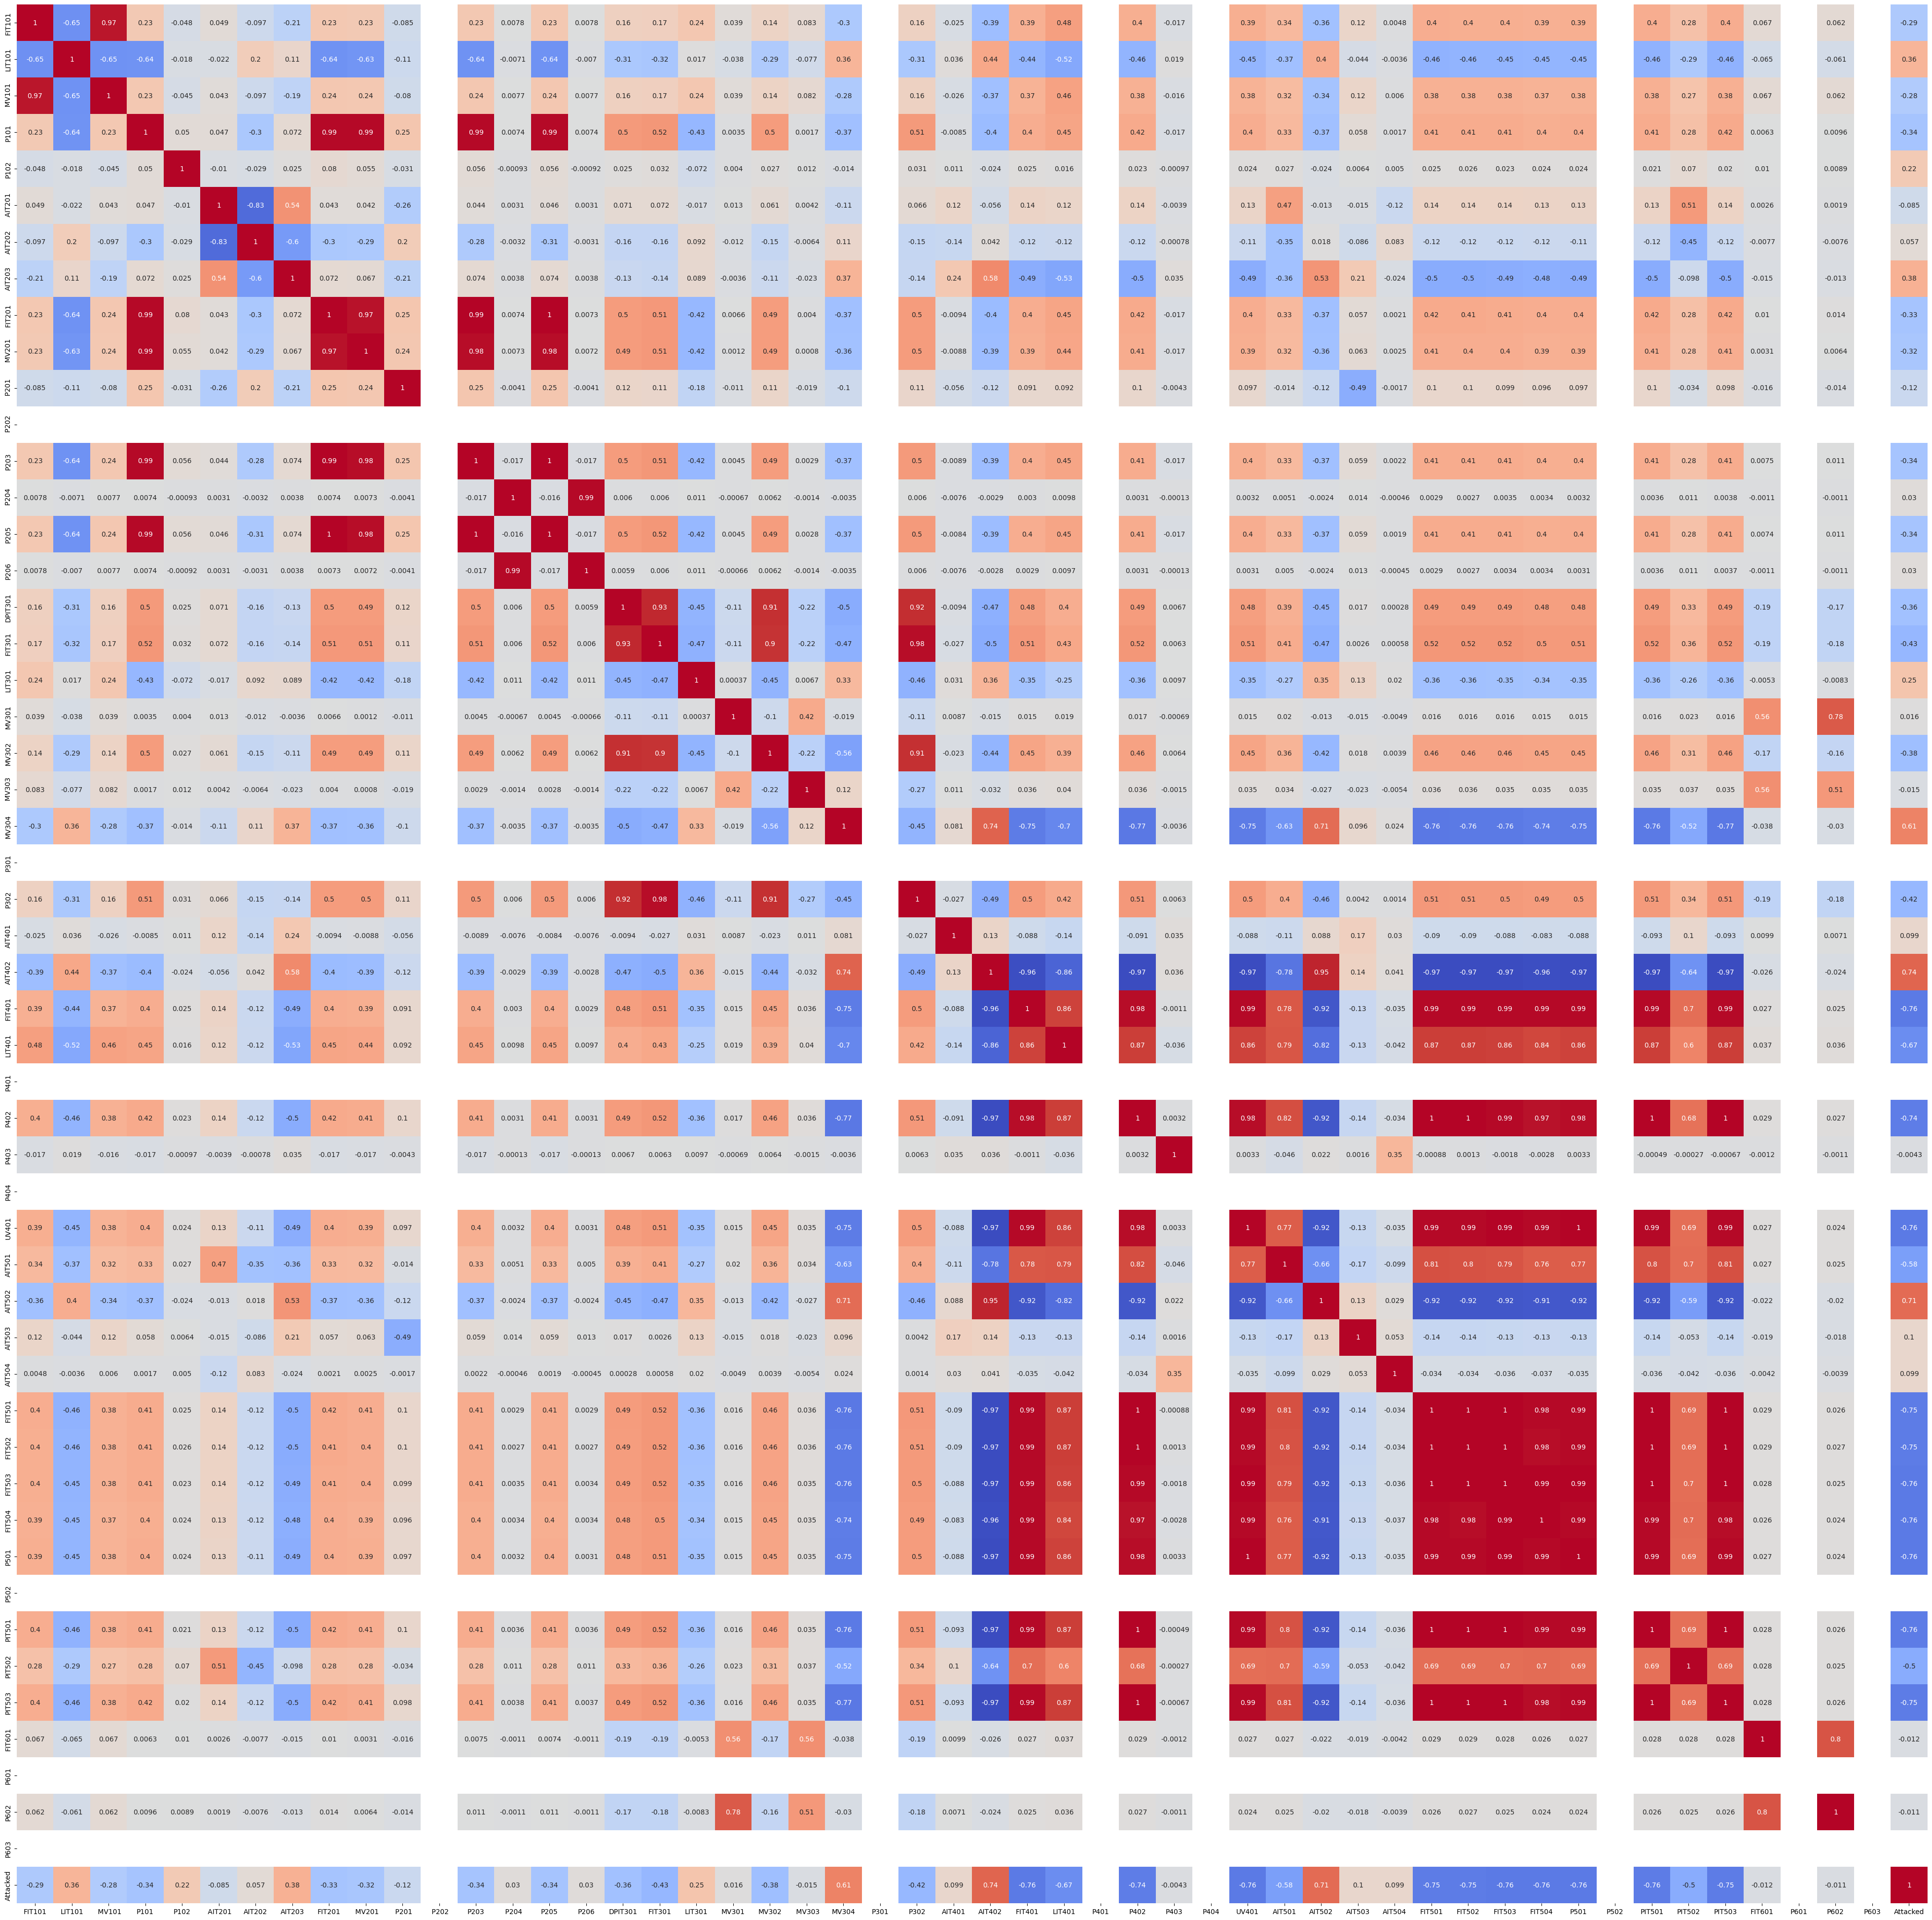

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#iris = sns.load_dataset('iris')

# Compute the correlation matrix
corr_matrix = df.corr()

fig,ax= plt.subplots (figsize= (50,50))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws= {'size': 10}, cbar= False, ax=ax)

# Show the plot
plt.show()

In [ ]:
#Making new datafram to include columns that have higher coorelation with the Attacked column


df_corr = df[['AIT402','FIT401','LIT401','AIT502','FIT501','FIT502','FIT503','FIT504','PIT501','PIT503','Attacked' ]]
df_corr.head()

,AIT402,FIT401,LIT401,AIT502,FIT501,FIT502,FIT503,FIT504,PIT501,PIT503,Attacked
0,156.0882,1.713517,942.0662,145.1166,1.723789,1.279621,0.735269,0.307786,250.8652,189.5988,0
1,156.0882,1.715952,942.0277,145.1166,1.723789,1.297554,0.735269,0.307786,250.8652,189.6789,0
2,156.0882,1.715952,941.8739,145.1166,1.723404,1.293967,0.735269,0.308619,250.8812,189.6789,0
3,156.0882,1.714670,941.7970,145.0141,1.723404,1.281158,0.735269,0.308619,250.8812,189.6148,0
4,156.0882,1.714670,942.2200,144.8859,1.723404,1.281158,0.735269,0.308619,250.8812,189.5027,0


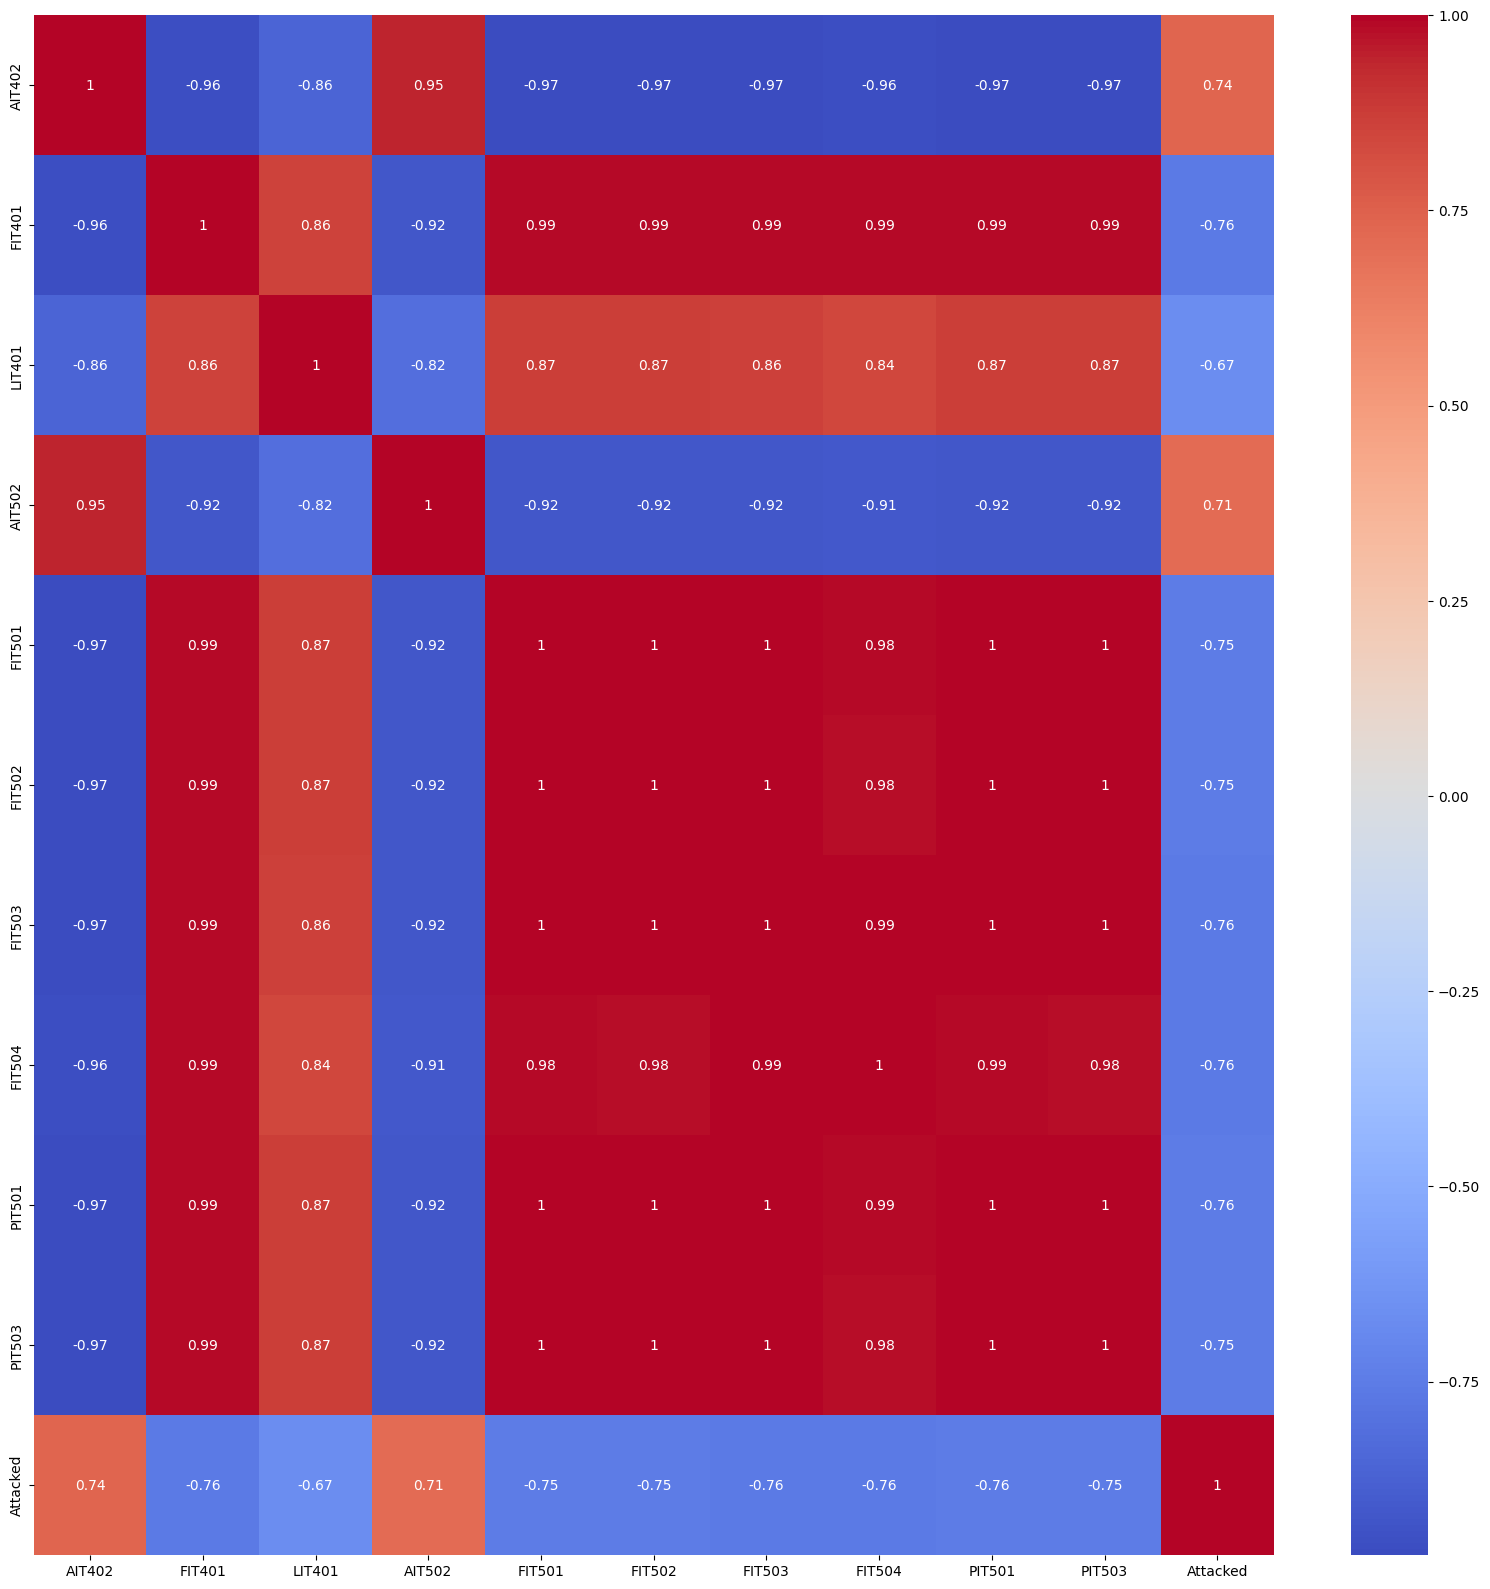

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#iris = sns.load_dataset('iris')

# Compute the correlation matrix
corr_matrix = df_corr.corr()

fig,ax= plt.subplots (figsize= (20,20))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws= {'size': 10}, cbar= True, ax=ax)

# Show the plot
plt.show()

Details of the code below

Code below prepare the data in df for the detection of **Normal** / **Attacked** records. All the manipulation of the data is done for *df* while *dfs* is not altered.

In [ ]:
df_attack = df_corr.loc[df_corr['Attacked'] == 1]
df_attack.shape

df_norm = df_corr.loc[df_corr['Attacked'] == 0]
df_norm.shape

df_train_norm = df_norm.iloc[1:300000]
#df_train_norm.shape
df_train_attack = df_attack.iloc[1:40000]
#df_train_attack.shape

df_train = df_train_norm.append(df_train_attack)
#df_train.shape

df_train_updated = df_train.append(df_train_attack)
df_train_updated = df_train_updated.sample(frac=1)

df_test_norm = df_norm.iloc[300001:395297]
df_test_norm.shape

df_test_attack = df_attack.iloc[40001:54620]
#df_test_attack.shape

df_test = df_test_norm.append(df_test_attack)
df_test_updated = df_test.append(df_test_attack)
df_test_updated = df_test_updated.sample(frac=1)

df_test_updated.shape, df_train_updated.shape
#df_train.shape, df_test.shape

<ipython-input-12-342bee2a86ee>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_norm.append(df_train_attack)
<ipython-input-12-342bee2a86ee>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_updated = df_train.append(df_train_attack)
<ipython-input-12-342bee2a86ee>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test_norm.append(df_test_attack)
<ipython-input-12-342bee2a86ee>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_updated = df_test.append(df_test_attack)


((124534, 11), (379997, 11))

Up until now we have created 2 different dataframs.

1)df_train includes the training dataset

2)df_test includes the test dataset


As a next step to improve the accuracy and F1 score in the training model stage we have introduced two new dataframes.



*   df_test_updated
*   df_train_updated

these includes that are randomly distributed accross the df unlike the one in the *df_train* & *df_test*



In [ ]:
df_test.shape, df_train.shape

((109915, 11), (339998, 11))

to overcome the overfitting in the model we will keep the test set as it is but will make bucket for the trainng dataset which includes 339998 records.

First we will check the number of normal and attacked records and then make bucket accordingly.

In [ ]:
df_train_updated['Attacked'].value_counts()

0    299999
1     79998
Name: Attacked, dtype: int64

In [ ]:
#A check to varify that at record 300000 the normal records change to attacked one.
list_of_rows = df_train.iloc[299995:300005]

list_of_rows.head(10)

,AIT402,FIT401,LIT401,AIT502,FIT501,FIT502,FIT503,FIT504,PIT501,PIT503,Attacked
349913,145.0654,1.718515,848.2825,137.8621,1.727378,1.298322,0.732580,0.306633,249.8558,188.1409,0
349914,145.0654,1.718515,848.7439,137.8621,1.726096,1.304086,0.732580,0.306633,249.8558,188.0127,0
349915,145.0654,1.718515,849.2438,137.8621,1.724301,1.304086,0.732580,0.306633,249.8558,187.9967,0
349916,145.0654,1.718515,849.1669,137.8621,1.724045,1.302165,0.732580,0.306633,249.8558,187.9967,0
1755,154.1912,1.711595,809.2156,143.4760,1.725327,1.280646,0.735397,0.308106,249.8718,188.7977,1
1756,154.1912,1.711595,809.2156,143.4760,1.725327,1.280646,0.735397,0.308106,249.8718,188.7977,1
1757,154.1912,1.711595,809.0233,143.4760,1.725327,1.289996,0.735397,0.308106,249.8718,188.7977,1
1758,154.1912,1.711595,808.9464,143.4760,1.725327,1.299603,0.735397,0.308106,250.0801,188.9740,1
1759,154.1912,1.711595,808.7926,143.4760,1.725327,1.301652,0.735397,0.308619,250.1923,188.9740,1
1760,154.1912,1.711595,808.9464,143.4760,1.725327,1.284745,0.735397,0.308619,250.1923,188.9740,1


In [ ]:
df_test_updated['Attacked'].value_counts()

0    95296
1    29238
Name: Attacked, dtype: int64

We have seen that training datafram *df_train* includes **299999** normal records and **39999** attacked records

Test dataframe *df_test* includes **95296** normal records and **14619** attacked records

Now *df_train* can be split into multiple buckets for the training process and avg out the accuracy from the buckets

In [ ]:
df_train_attack.shape

(39999, 11)

In [ ]:
df_train_bucket1 = df_train_updated.iloc[1:76000]
df_train_bucket1['Attacked'].value_counts()
#df_train_bucket1 = df_train_bucket1.append(df_train_attack)
#df_train_bucket1.shape


#df_train_norm = df_norm.iloc[1:300000]
#df_train_norm.shape

0    60276
1    15723
Name: Attacked, dtype: int64

In [ ]:
df_train_bucket1.head()

,AIT402,FIT401,LIT401,AIT502,FIT501,FIT502,FIT503,FIT504,PIT501,PIT503,Attacked
163490,150.9613,1.705956,975.7114,142.8095,1.715970,1.291789,0.737829,0.307081,251.7784,190.0634,0
331892,146.8342,1.716208,866.6624,139.3233,1.727506,1.282439,0.732324,0.306761,251.0574,188.7977,0
198523,149.5001,1.731586,852.8967,142.7839,1.738529,1.311259,0.727843,0.304583,244.5847,184.0554,1
198624,149.7821,1.733380,860.4332,143.0659,1.745322,1.306648,0.727843,0.306761,244.9052,184.2156,1
149571,152.6019,1.710954,891.2715,145.1679,1.724430,1.274625,0.734757,0.306249,250.5768,188.9580,0


In [ ]:
df_train_bucket2 = df_train_updated.iloc[76000:151998]
df_train_bucket2['Attacked'].value_counts()
#df_train_bucket2 = df_train_bucket2.append(df_train_attack)
#df_train_bucket2.shape

0    59869
1    16129
Name: Attacked, dtype: int64

In [ ]:
df_train_bucket3 = df_train_updated.iloc[151998:227998]
df_train_bucket3['Attacked'].value_counts()
#df_train_bucket3 = df_train_bucket3.append(df_train_attack)
#df_train_bucket3.shape

0    59927
1    16073
Name: Attacked, dtype: int64

In [ ]:
df_train_bucket4 = df_train_updated.iloc[227998:303998]
df_train_bucket4['Attacked'].value_counts()
#df_train_bucket4 = df_train_bucket4.append(df_train_attack)
#df_train_bucket4.shape

0    59863
1    16137
Name: Attacked, dtype: int64

In [ ]:
df_train_bucket5 = df_train_updated.iloc[303998:379997]
df_train_bucket5['Attacked'].value_counts()
#df_train_bucket5 = df_train_bucket5.append(df_train_attack)
#df_train_bucket5.shape

0    60063
1    15936
Name: Attacked, dtype: int64

In [ ]:
#this cell will only varify if the records found in the dataframe "df_train_bucket5" show change in the "Attacked" column between row 49994-50003

#df_train_b5 = df_train_bucket5.iloc[49994:50003]
#df_train_b5.head(9)

In [ ]:
#df_train_bucket6 = df_train_norm.iloc[250000:299999]
#df_train_bucket6 = df_train_bucket6.append(df_train_attack)
#df_train_bucket6.shape

In [ ]:
#df_train.head()
df_test.tail()

,AIT402,FIT401,LIT401,AIT502,FIT501,FIT502,FIT503,FIT504,PIT501,PIT503,Attacked
445185,144.4501,1.715439,986.6701,138.2466,1.724942,1.262713,0.734629,0.306569,249.5193,187.5801,1
445186,144.4501,1.715439,987.0546,138.2466,1.724942,1.255284,0.734629,0.306569,249.5193,187.5801,1
445187,144.6296,1.715439,987.3622,138.5542,1.724942,1.246189,0.734629,0.308362,249.5193,187.5801,1
445188,144.6296,1.715439,987.6313,138.5542,1.724942,1.244396,0.734629,0.308042,249.5193,187.5801,1
445189,144.6296,1.715439,987.7467,138.5542,1.724045,1.265659,0.734629,0.306633,249.5193,187.5801,1


Up untill now we have created seprate bucket that includes almost equal number of attacked and normal records.


*   df_train_bucket1
*   df_train_bucket2
*   df_train_bucket3
*   df_train_bucket4
*   df_train_bucket5


Next we will have to prepare these buckets for feeding them to training model.

In [ ]:
df_train_x1 = df_train_bucket1.drop(['Attacked'], axis=1)
df_train_x2 = df_train_bucket2.drop(['Attacked'], axis=1)
df_train_x3 = df_train_bucket3.drop(['Attacked'], axis=1)
df_train_x4 = df_train_bucket4.drop(['Attacked'], axis=1)
df_train_x5 = df_train_bucket5.drop(['Attacked'], axis=1)
#df_train_x6 = df_train_bucket6.drop(['Attacked'], axis=1)


#df_train_x = df_train.drop(['Attacked'], axis=1)
df_test_x = df_test_updated.drop(['Attacked'], axis=1)

In [ ]:
df_train_x1.head()

,AIT402,FIT401,LIT401,AIT502,FIT501,FIT502,FIT503,FIT504,PIT501,PIT503
163490,150.9613,1.705956,975.7114,142.8095,1.715970,1.291789,0.737829,0.307081,251.7784,190.0634
331892,146.8342,1.716208,866.6624,139.3233,1.727506,1.282439,0.732324,0.306761,251.0574,188.7977
198523,149.5001,1.731586,852.8967,142.7839,1.738529,1.311259,0.727843,0.304583,244.5847,184.0554
198624,149.7821,1.733380,860.4332,143.0659,1.745322,1.306648,0.727843,0.306761,244.9052,184.2156
149571,152.6019,1.710954,891.2715,145.1679,1.724430,1.274625,0.734757,0.306249,250.5768,188.9580


In [ ]:
#from sklearn.linear_model import LogisticRegression
#x_train = df_train['AIT402'].to_numpy().reshape((len(df_train['AIT402']), 1))
#y_train = df_train['Attacked'].to_numpy()

x_train1 = df_train_x1.to_numpy()
x_train2 = df_train_x2.to_numpy()
x_train3 = df_train_x3.to_numpy()
x_train4 = df_train_x4.to_numpy()
x_train5 = df_train_x5.to_numpy()
#x_train6 = df_train_x6.to_numpy()

y_train1 = df_train_bucket1['Attacked'].to_numpy()
y_train2 = df_train_bucket2['Attacked'].to_numpy()
y_train3 = df_train_bucket3['Attacked'].to_numpy()
y_train4 = df_train_bucket4['Attacked'].to_numpy()
y_train5 = df_train_bucket5['Attacked'].to_numpy()
#y_train6 = df_train_bucket6['Attacked'].to_numpy()
#x_train = df_train.to_numpy()
#y_train = df_train['Attacked'].to_numpy()

x_train1.shape, y_train1.shape

((75999, 10), (75999,))

In [ ]:
x_train1

array([[1.470136e+02, 1.724794e+00, 7.814535e+02, ..., 3.066329e-01,
        2.471482e+02, 1.860901e+02],
       [1.516791e+02, 1.716849e+00, 8.198282e+02, ..., 3.065689e-01,
        2.493912e+02, 1.881409e+02],
       [1.539093e+02, 1.718387e+00, 9.198795e+02, ..., 3.065689e-01,
        2.505928e+02, 1.891022e+02],
       ...,
       [1.534735e+02, 1.726076e+00, 9.000769e+02, ..., 3.065689e-01,
        2.476128e+02, 1.865708e+02],
       [1.484235e+02, 1.712748e+00, 8.719303e+02, ..., 3.065689e-01,
        2.509773e+02, 1.891983e+02],
       [1.527044e+02, 1.721975e+00, 8.014484e+02, ..., 3.065689e-01,
        2.494232e+02, 1.879166e+02]])

In [ ]:
x_train1.shape

(75999, 10)

In [ ]:
#x_test = df_test_x.to_numpy()
y_test = df_test_updated['Attacked'].to_numpy()
df_test_x.shape, y_test.shape

((124534, 10), (124534,))

In [ ]:
#not training this anymore

lr = LogisticRegression().fit(x_train, y_train)
linear_train_predict = lr.predict(x_train)
mean_absolute_error(linear_train_predict, y_train)

x_test = df_test_x.to_numpy()
y_test = df_test['Attacked'].to_numpy()
x_test.shape,y_test.shape

0.04378555167971576

In [ ]:
linear_test_predict = lr.predict(x_test)
mean_absolute_error(linear_test_predict, y_test)

0.05611608970568166

We have found error on training and test set using Logistic Regression.


*  Train error: 0.04688262872134542
*  Test error: 0.061665832688895965



 Next these steps are to be performed on **Random Forest** and we will find the taring and test errors

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without

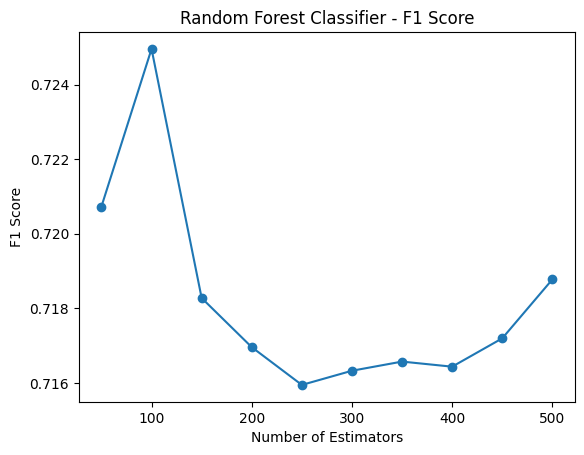

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

#rf = RandomForestRegressor(n_estimators=10, max_depth=5).fit(x_train, y_train) #we can change the n_estimaters and max depth of the RandomeForest function
#rf_train_preds = rf.predict(x_train)
#rf_test_preds = rf.predict(x_test)
#mean_absolute_error(rf_train_preds, y_train), mean_absolute_error(rf_test_preds, y_test)

#*******************************************************************

# Varying number of estimators
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# F1 scores for each number of estimators
f1_scores = []
#*******************************************************************

#########################################################
#Training model and calculation evaluation indexes for training-bucket1
# rf = RandomForestRegressor(n_estimators=30, max_depth=15).fit(x_train1, y_train1)

# y_pred_test = rf.predict(df_test_x)
# y_pred_1 = y_pred_test > 0.70
# y_pred_scaled = y_pred_1.astype(int)

# y_pred_train= rf.predict(x_train1)
# y_pred_tr1 = y_pred_train > 0.70
# y_pred_tr_scaled = y_pred_tr1.astype(int)

# # Display F1 score
# f1 = f1_score(y_test,y_pred_scaled)

# #view accuracy
# accuracy = accuracy_score(y_test, y_pred_scaled)

# # Mean absolute errors for train and test
# rf_train_preds = rf.predict(x_train1)
# rf_test_preds = rf.predict(df_test_x)
# MAE_train = mean_absolute_error(rf_train_preds, y_train1)
# MAE_test = mean_absolute_error(rf_test_preds, y_test)


# #precision, recall, fscore, support = score(y_test, y_pred_scaled)

# #print('precision: {}'.format(precision))
# #print('recall: {}'.format(recall))
# #print('fscore: {}'.format(fscore))
# #print('support: {}'.format(support))
# #Display all evaluation indexes
# f1, accuracy, MAE_train, MAE_test

################################################

# Train the Random Forest classifier for each number of estimators
for n in n_estimators:
    # Create and train the classifier
    rf = RandomForestClassifier(n_estimators=n, random_state=42, max_depth=15)
    rf.fit(x_train1, y_train1)

    # Make predictions on the test set
    y_pred = rf.predict(df_test_x)

    # Compute the F1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

# Plotting the F1 scores
plt.plot(n_estimators, f1_scores, marker='o')

# Add labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('Random Forest Classifier - F1 Score')

# Show the plot
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


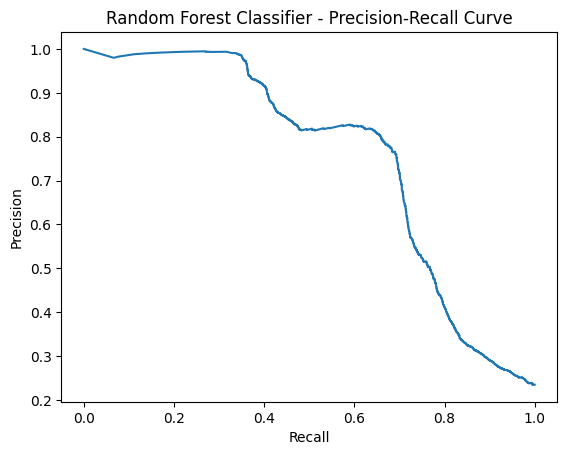

In [ ]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities on the test set
y_probs = rf.predict_proba(df_test_x)
y_probs = y_probs[:, 1]  # Take probabilities of positive class

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot the precision-recall curve
plt.plot(recall, precision)

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Classifier - Precision-Recall Curve')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


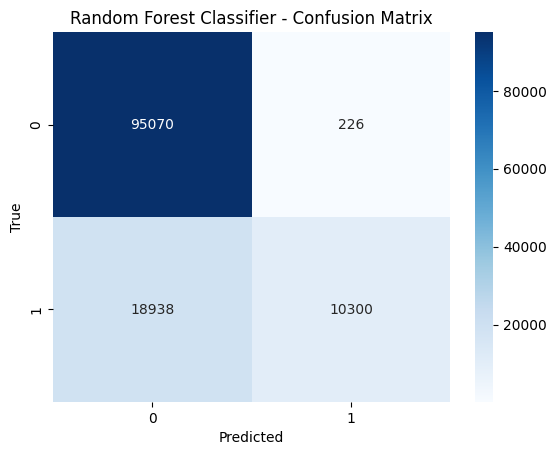

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(df_test_x)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Classifier - Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Generate a classification report
print(classification_report(y_test, y_pred_scaled))

We can observe that **Random Forest** is performing worst than the Logistic Regressor.



*   Train error: 0.08296765742367572
*   Test error: 0.20151031020691387





Now we will train the dataset on **Gaussian Naive Bayes** model and find the errors on Train and Test sets.

In [ ]:
#Training model and calculation evaluation indexes for training-bucket2
rf = RandomForestRegressor(n_estimators=30, max_depth=15).fit(x_train2, y_train2)

y_pred_test = rf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= rf.predict(x_train2)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)

#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)

# Mean absolute errors for train and test
rf_train_preds = rf.predict(x_train2)
rf_test_preds = rf.predict(df_test_x)
MAE_train = mean_absolute_error(rf_train_preds, y_train2)
MAE_test = mean_absolute_error(rf_test_preds, y_test)

#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


(0.4547277332207683,
 0.834037291020926,
 0.019397087264847006,
 0.15832325518227602)

In [ ]:
#Training model and calculation evaluation indexes for training-bucket3
rf = RandomForestRegressor(n_estimators=30, max_depth=15).fit(x_train3, y_train3)

y_pred_test = rf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= rf.predict(x_train3)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)

#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)

# Mean absolute errors for train and test
rf_train_preds = rf.predict(x_train3)
rf_test_preds = rf.predict(df_test_x)
MAE_train = mean_absolute_error(rf_train_preds, y_train3)
MAE_test = mean_absolute_error(rf_test_preds, y_test)

#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


(0.45437989917918126,
 0.8339971413429265,
 0.02113169184510115,
 0.16188216337171646)

In [ ]:
#Training model and calculation evaluation indexes for training-bucket4
rf = RandomForestRegressor(n_estimators=30, max_depth=15).fit(x_train4, y_train4)

y_pred_test = rf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= rf.predict(x_train4)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)

#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)

# Mean absolute errors for train and test
rf_train_preds = rf.predict(x_train4)
rf_test_preds = rf.predict(df_test_x)
MAE_train = mean_absolute_error(rf_train_preds, y_train4)
MAE_test = mean_absolute_error(rf_test_preds, y_test)

#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


(0.451461060425757,
 0.8334350458509323,
 0.021412551445387878,
 0.1623417433525516)

In [ ]:
#Training model and calculation evaluation indexes for training-bucket5
rf = RandomForestRegressor(n_estimators=30, max_depth=15).fit(x_train5, y_train5)

y_pred_test = rf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= rf.predict(x_train5)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)

#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)

# Mean absolute errors for train and test
rf_train_preds = rf.predict(x_train5)
rf_test_preds = rf.predict(df_test_x)
MAE_train = mean_absolute_error(rf_train_preds, y_train5)
MAE_test = mean_absolute_error(rf_test_preds, y_test)

#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


(0.46132828919714175,
 0.8353542004593123,
 0.02135830021632984,
 0.15726173842752447)

Hence, the 5 buckets of the training dataset give us the following AVG evaluation indexes for **Random Forest**



*   *f1 score*: **0.55**
*   *Accuracy*:  **0.832**
*   *Mean training error*: **0.02**
*   *Mean test error*: **0.151**




In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
#gnb = GaussianNB().fit(x_train, y_train)
#gnb_train_preds = gnb.predict(x_train)
#gnb_test_preds = gnb.predict(x_test)
#mean_absolute_error(gnb_train_preds, y_train), mean_absolute_error(gnb_test_preds, y_test)



#y_pred = gnb.predict(x_test)
#from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

(0.04410025941329067, 0.05379611517991175)

We observe **Gaussian Naive Bayes** is the best one yet close to **Logistic Regresser**


*   Train error: 0.04590027000158824
*   Test error: 0.061338306873493155



Now we will be evaluating the bucket training on SVM.

Below is the training on the 1st bucket and their relevent evaluation matrices.

In [ ]:
from sklearn import svm
#Create a svm Classifier (Bucket1)
svm_clf = svm.SVC(kernel='linear').fit(x_train1, y_train1) # Linear Kernel
y_pred_test = svm_clf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= svm_clf.predict(x_train1)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)
#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)
# Mean absolute errors for train and test
svm_train_preds = svm_clf.predict(x_train1)
svm_test_preds = svm_clf.predict(df_test_x)
MAE_train = mean_absolute_error(svm_train_preds, y_train1)
MAE_test = mean_absolute_error(svm_test_preds, y_test)
#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(0.7420702062495984,
 0.9032954855702058,
 0.07422466085080066,
 0.09670451442979427)

We observe **SVM** is among the best ones as well similar to Logistic Regressor and Naive Bayes


*   Train error: 0.046512038306107686
*   Test error: 0.06150206978119456

In [ ]:
from sklearn import svm

#Create a svm Classifier (Bucket2)
svm_clf = svm.SVC(kernel='linear').fit(x_train2, y_train2) # Linear Kernel

y_pred_test = svm_clf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= svm_clf.predict(x_train2)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)

#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)

# Mean absolute errors for train and test
svm_train_preds = svm_clf.predict(x_train2)
svm_test_preds = svm_clf.predict(df_test_x)
MAE_train = mean_absolute_error(svm_train_preds, y_train2)
MAE_test = mean_absolute_error(svm_test_preds, y_test)

#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(0.7443292357028327,
 0.9039700001605987,
 0.07329140240532646,
 0.09602999983940129)

In [ ]:
#Create a svm Classifier (Bucket3)
from sklearn import svm
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.svm import SVC
svm_clf = svm.SVC(kernel='linear', C=1, gamma=1).fit(x_train3, y_train3) # Linear Kernel


##############################################################
# y_pred_test = svm_clf.predict(df_test_x)
# y_pred_1 = y_pred_test > 0.90
# y_pred_scaled = y_pred_1.astype(int)

# y_pred_train= svm_clf.predict(x_train3)
# y_pred_tr1 = y_pred_train > 0.90
# y_pred_tr_scaled = y_pred_tr1.astype(int)

# # Display F1 score
# f1 = f1_score(y_test,y_pred_scaled)

# #view accuracy
# accuracy = accuracy_score(y_test, y_pred_scaled)

# # Mean absolute errors for train and test
# svm_train_preds = svm_clf.predict(x_train3)
# svm_test_preds = svm_clf.predict(df_test_x)
# MAE_train = mean_absolute_error(svm_train_preds, y_train3)
# MAE_test = mean_absolute_error(svm_test_preds, y_test)

# #Display all evaluation indexes
# f1, accuracy, MAE_train, MAE_test

################################################################

In [ ]:
distinct_values = df_corr['Attacked'].unique()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


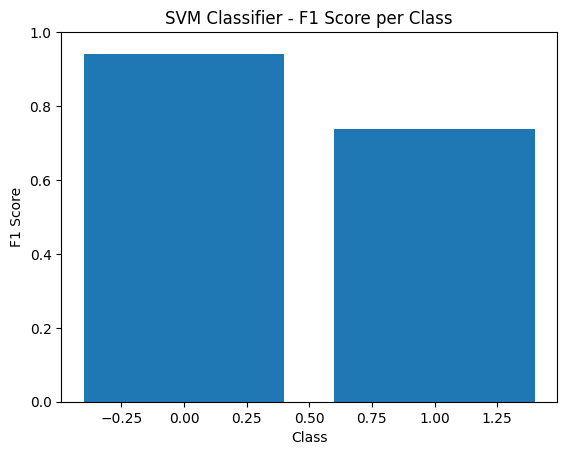

In [ ]:
# Make predictions on the test set
y_pred = svm_clf.predict(df_test_x)
y_pred_1 = y_pred > 0.90
y_pred_scaled = y_pred_1.astype(int)

# Compute the F1 score
f1 = f1_score(y_test, y_pred_scaled, average='weighted')

# Compute precision, recall, and support
_, _, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Plot the F1 score
#labels = iris.target_names
#column_headers = list(df_corr.columns.values)
plt.bar(distinct_values, fscore)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('SVM Classifier - F1 Score per Class')
plt.ylim([0, 1])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


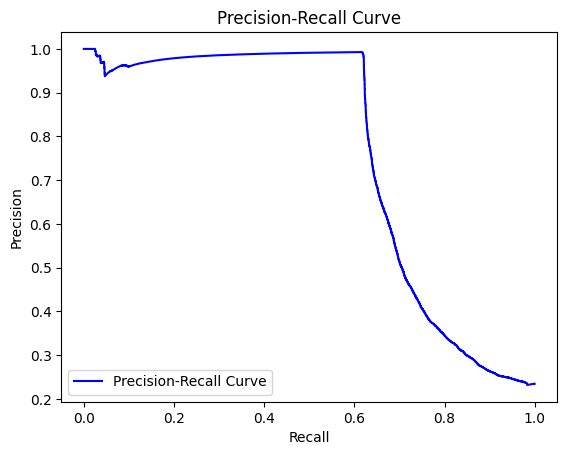

In [ ]:
# Predict probabilities for the test set
y_scores = svm_clf.decision_function(df_test_x)

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = svm_clf.predict(df_test_x)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


NameError: ignored

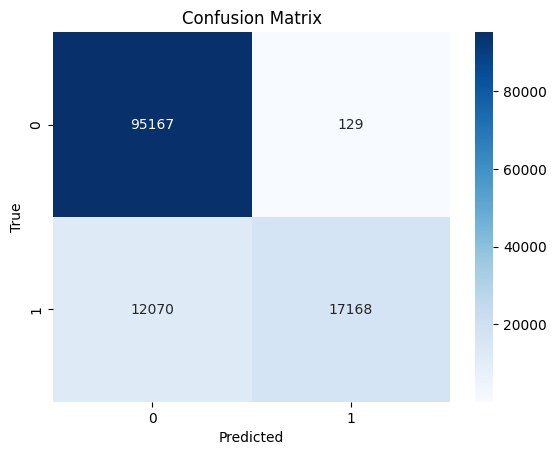

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=distinct_values, yticklabels=distinct_values)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Create a svm Classifier (Bucket4)
svm_clf = svm.SVC(kernel='linear').fit(x_train4, y_train4) # Linear Kernel

y_pred_test = svm_clf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= svm_clf.predict(x_train4)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)

#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)

# Mean absolute errors for train and test
svm_train_preds = svm_clf.predict(x_train4)
svm_test_preds = svm_clf.predict(df_test_x)
MAE_train = mean_absolute_error(svm_train_preds, y_train4)
MAE_test = mean_absolute_error(svm_test_preds, y_test)

#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(0.7443292357028327,
 0.9039700001605987,
 0.07346052631578948,
 0.09602999983940129)

In [ ]:
#Create a svm Classifier (Bucket5)
svm_clf = svm.SVC(kernel='linear').fit(x_train5, y_train5) # Linear Kernel

y_pred_test = svm_clf.predict(df_test_x)
y_pred_1 = y_pred_test > 0.90
y_pred_scaled = y_pred_1.astype(int)

y_pred_train= svm_clf.predict(x_train5)
y_pred_tr1 = y_pred_train > 0.90
y_pred_tr_scaled = y_pred_tr1.astype(int)

# Display F1 score
f1 = f1_score(y_test,y_pred_scaled)

#view accuracy
accuracy = accuracy_score(y_test, y_pred_scaled)

# Mean absolute errors for train and test
svm_train_preds = svm_clf.predict(x_train5)
svm_test_preds = svm_clf.predict(df_test_x)
MAE_train = mean_absolute_error(svm_train_preds, y_train5)
MAE_test = mean_absolute_error(svm_test_preds, y_test)

#Display all evaluation indexes
f1, accuracy, MAE_train, MAE_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(0.6753867664967752,
 0.884417106974802,
 0.07276411531730681,
 0.11558289302519793)

Hence, the 5 buckets of the training dataset give us the following AVG evaluation indexes for **SVM**



*   *f1 score*: **0.711**
*   *Accuracy*:  **0.894**
*   *Mean training error*: **0.073**
*   *Mean test error*: **0.105**



In [ ]:
#Creating a Neural Net (Bucket1)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train1, y_train1, epochs=10, batch_size=32, validation_split=0.2)
# Predict on the training data
train_preds = model.predict(x_train1)
train_preds = [1 if y >= 0.85 else 0 for y in train_preds]
# Predict on the test data
test_preds = model.predict(df_test_x)
test_preds = [1 if y >= 0.85 else 0 for y in test_preds]
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(df_test_x, y_test)
# Calculate the mean absolute error for the training and test sets
train_mae = mean_absolute_error(y_train1, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
# Calculate the F1 score for the training and test sets
train_f1 = f1_score(y_train1, train_preds)
test_f1 = f1_score(y_test, test_preds)
#Display the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Epoch 1/10
1900/1900 [==============================] - 8s 3ms/step - loss: 0.8986 - accuracy: 0.9117 - val_loss: 0.2718 - val_accuracy: 0.9189
Epoch 2/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2909 - accuracy: 0.9188 - val_loss: 0.2646 - val_accuracy: 0.9197
Epoch 3/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.9198 - val_loss: 0.2617 - val_accuracy: 0.9205
Epoch 4/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.9209 - val_loss: 0.2801 - val_accuracy: 0.9205
Epoch 5/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2713 - accuracy: 0.9215 - val_loss: 0.2569 - val_accuracy: 0.9203
Epoch 6/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9216 - val_loss: 0.2602 - val_accuracy: 0.9182
Epoch 7/10
1900/1900 [==============================] - 5s 2ms/step - loss: 0.2605 - accuracy: 0.9219 - val_loss: 0.2571 - val_accuracy:

In [ ]:
#Creating a Neural Net (Bucket2)

from sklearn.metrics import mean_absolute_error, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train2, y_train2, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the training data
train_preds = model.predict(x_train2)
train_preds = [1 if y >= 0.85 else 0 for y in train_preds]

# Predict on the test data
test_preds = model.predict(df_test_x)
test_preds = [1 if y >= 0.85 else 0 for y in test_preds]

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(df_test_x, y_test)

# Calculate the mean absolute error for the training and test sets
train_mae = mean_absolute_error(y_train2, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

# Calculate the F1 score for the training and test sets
train_f1 = f1_score(y_train2, train_preds)
test_f1 = f1_score(y_test, test_preds)

#Display the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Epoch 1/10
1900/1900 [==============================] - 5s 2ms/step - loss: 0.4284 - accuracy: 0.9135 - val_loss: 0.4332 - val_accuracy: 0.9199
Epoch 2/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.9218 - val_loss: 0.2706 - val_accuracy: 0.9228
Epoch 3/10
1900/1900 [==============================] - 6s 3ms/step - loss: 0.2906 - accuracy: 0.9206 - val_loss: 0.2499 - val_accuracy: 0.9247
Epoch 4/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.9220 - val_loss: 0.3163 - val_accuracy: 0.9237
Epoch 5/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2742 - accuracy: 0.9215 - val_loss: 0.2529 - val_accuracy: 0.9243
Epoch 6/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2740 - accuracy: 0.9213 - val_loss: 0.2520 - val_accuracy: 0.9245
Epoch 7/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.9219 - val_loss: 0.2594 - val_accuracy:

Epoch 1/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9244
Epoch 2/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2543 - accuracy: 0.9245
Epoch 3/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2503 - accuracy: 0.9260
Epoch 4/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9275
Epoch 5/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2465 - accuracy: 0.9278
Epoch 6/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2453 - accuracy: 0.9281
Epoch 7/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2428 - accuracy: 0.9287
Epoch 8/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2424 - accuracy: 0.9284
Epoch 9/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2404 - accuracy: 0.9287
Epoch 10/10
3892/3892 [==============================] - 5s 1ms/step
F1 score: 0.6

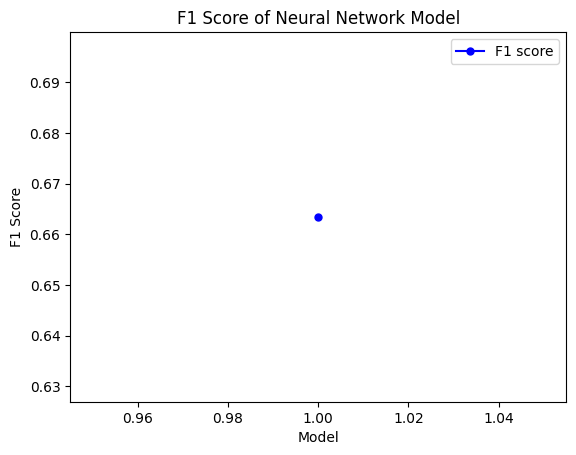

In [ ]:
# Train the model
model.fit(x_train2, y_train2, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred_prob = model.predict(df_test_x)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

# Plotting the F1 score
plt.plot([1], [f1], marker='o', markersize=5, color='blue', label='F1 score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Neural Network Model')
plt.legend()
plt.show()

Epoch 1/10
2375/2375 [==============================] - 6s 2ms/step - loss: 0.2378 - accuracy: 0.9286
Epoch 2/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2375 - accuracy: 0.9288
Epoch 3/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2373 - accuracy: 0.9292
Epoch 4/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2364 - accuracy: 0.9289
Epoch 5/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2344 - accuracy: 0.9288
Epoch 6/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2340 - accuracy: 0.9291
Epoch 7/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2358 - accuracy: 0.9286
Epoch 8/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2337 - accuracy: 0.9292
Epoch 9/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2327 - accuracy: 0.9290
Epoch 10/10
3892/3892 [==============================] - 6s 1ms/step


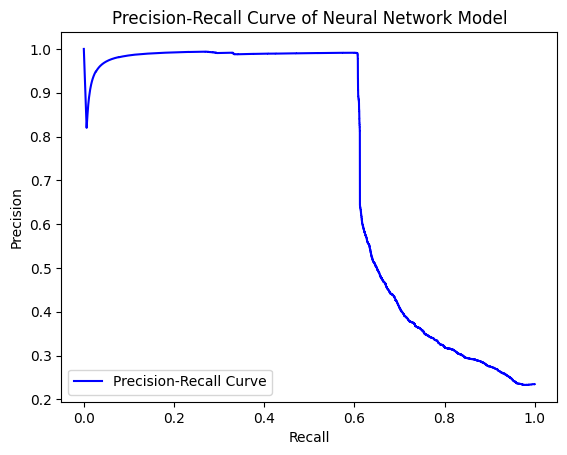

In [ ]:
from sklearn.metrics import precision_recall_curve

model.fit(x_train2, y_train2, epochs=10, batch_size=32)

# Predict class probabilities for the test set
y_scores = model.predict(df_test_x)

# Calculate precision and recall manually
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Neural Network Model')
plt.legend()
plt.show()

Epoch 1/10
2375/2375 [==============================] - 8s 3ms/step - loss: 0.2336 - accuracy: 0.9293
Epoch 2/10
2375/2375 [==============================] - 8s 3ms/step - loss: 0.2340 - accuracy: 0.9291
Epoch 3/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2336 - accuracy: 0.9293
Epoch 4/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2341 - accuracy: 0.9292
Epoch 5/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2345 - accuracy: 0.9290
Epoch 6/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2330 - accuracy: 0.9294
Epoch 7/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2344 - accuracy: 0.9295
Epoch 8/10
2375/2375 [==============================] - 5s 2ms/step - loss: 0.2327 - accuracy: 0.9292
Epoch 9/10
2375/2375 [==============================] - 4s 2ms/step - loss: 0.2359 - accuracy: 0.9289
Epoch 10/10
3892/3892 [==============================] - 6s 2ms/step


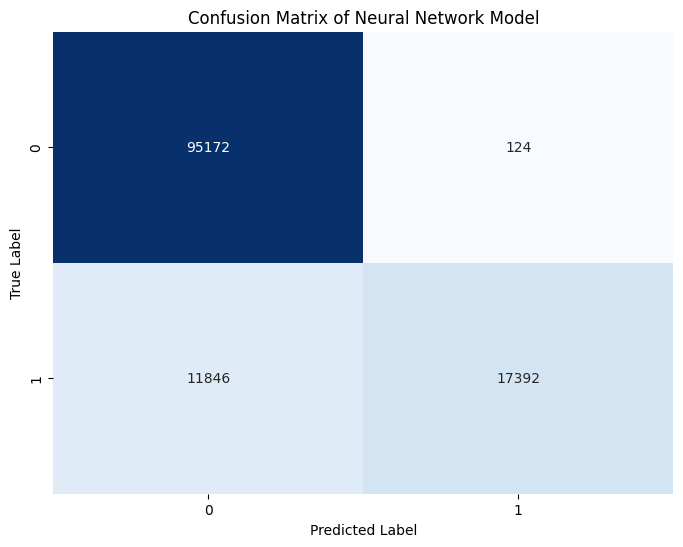

In [ ]:
from sklearn.metrics import confusion_matrix
model.fit(x_train2, y_train2, epochs=10, batch_size=32)

# Predict probabilities for the test set
y_prob = model.predict(df_test_x)
y_pred = np.round(y_prob)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Neural Network Model')
plt.show()

In [ ]:
#Creating a Neural Net (Bucket3)

from sklearn.metrics import mean_absolute_error, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train3, y_train3, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the training data
train_preds = model.predict(x_train3)
train_preds = [1 if y >= 0.85 else 0 for y in train_preds]

# Predict on the test data
test_preds = model.predict(df_test_x)
test_preds = [1 if y >= 0.85 else 0 for y in test_preds]

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(df_test_x, y_test)

# Calculate the mean absolute error for the training and test sets
train_mae = mean_absolute_error(y_train3, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

# Calculate the F1 score for the training and test sets
train_f1 = f1_score(y_train3, train_preds)
test_f1 = f1_score(y_test, test_preds)

#Display the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Epoch 1/10
1900/1900 [==============================] - 5s 2ms/step - loss: 0.9230 - accuracy: 0.9157 - val_loss: 0.2570 - val_accuracy: 0.9237
Epoch 2/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.9191 - val_loss: 0.2553 - val_accuracy: 0.9241
Epoch 3/10
1900/1900 [==============================] - 6s 3ms/step - loss: 0.3059 - accuracy: 0.9190 - val_loss: 0.2654 - val_accuracy: 0.9240
Epoch 4/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9213 - val_loss: 0.2758 - val_accuracy: 0.9241
Epoch 5/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.9215 - val_loss: 0.3257 - val_accuracy: 0.9243
Epoch 6/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2877 - accuracy: 0.9220 - val_loss: 0.4463 - val_accuracy: 0.9076
Epoch 7/10
1900/1900 [==============================] - 5s 2ms/step - loss: 0.2871 - accuracy: 0.9218 - val_loss: 0.2929 - val_accuracy:

In [ ]:
#Creating a Neural Net (Bucket4)

from sklearn.metrics import mean_absolute_error, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train4, y_train4, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the training data
train_preds = model.predict(x_train4)
train_preds = [1 if y >= 0.85 else 0 for y in train_preds]

# Predict on the test data
test_preds = model.predict(df_test_x)
test_preds = [1 if y >= 0.85 else 0 for y in test_preds]

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(df_test_x, y_test)

# Calculate the mean absolute error for the training and test sets
train_mae = mean_absolute_error(y_train4, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

# Calculate the F1 score for the training and test sets
train_f1 = f1_score(y_train4, train_preds)
test_f1 = f1_score(y_test, test_preds)

#Display the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Epoch 1/10
1900/1900 [==============================] - 6s 3ms/step - loss: 1.3668 - accuracy: 0.9058 - val_loss: 0.2723 - val_accuracy: 0.9203
Epoch 2/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.3163 - accuracy: 0.9157 - val_loss: 0.2872 - val_accuracy: 0.9195
Epoch 3/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.9173 - val_loss: 0.2688 - val_accuracy: 0.9266
Epoch 4/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2994 - accuracy: 0.9202 - val_loss: 0.2755 - val_accuracy: 0.9189
Epoch 5/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2926 - accuracy: 0.9212 - val_loss: 0.2872 - val_accuracy: 0.9219
Epoch 6/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.9227 - val_loss: 0.2693 - val_accuracy: 0.9220
Epoch 7/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2858 - accuracy: 0.9228 - val_loss: 0.2628 - val_accuracy:

In [ ]:
#Creating a Neural Net (Bucket5)

from sklearn.metrics import mean_absolute_error, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train5, y_train5, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the training data
train_preds = model.predict(x_train5)
train_preds = [1 if y >= 0.85 else 0 for y in train_preds]

# Predict on the test data
test_preds = model.predict(df_test_x)
test_preds = [1 if y >= 0.85 else 0 for y in test_preds]

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(df_test_x, y_test)

# Calculate the mean absolute error for the training and test sets
train_mae = mean_absolute_error(y_train5, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

# Calculate the F1 score for the training and test sets
train_f1 = f1_score(y_train5, train_preds)
test_f1 = f1_score(y_test, test_preds)

#Display the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Epoch 1/10
1900/1900 [==============================] - 7s 3ms/step - loss: 0.8420 - accuracy: 0.9062 - val_loss: 0.5368 - val_accuracy: 0.9174
Epoch 2/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.9170 - val_loss: 0.3127 - val_accuracy: 0.9192
Epoch 3/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.3060 - accuracy: 0.9172 - val_loss: 0.2885 - val_accuracy: 0.9193
Epoch 4/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2903 - accuracy: 0.9213 - val_loss: 0.2764 - val_accuracy: 0.9195
Epoch 5/10
1900/1900 [==============================] - 4s 2ms/step - loss: 0.2859 - accuracy: 0.9232 - val_loss: 0.3567 - val_accuracy: 0.9220
Epoch 6/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9228 - val_loss: 0.3090 - val_accuracy: 0.9201
Epoch 7/10
1900/1900 [==============================] - 5s 3ms/step - loss: 0.2719 - accuracy: 0.9241 - val_loss: 0.2569 - val_accuracy:

Hence, the 5 buckets of the training dataset give us the following AVG evaluation indexes for Neural Network



*   *f1 score*: **0.714**
*   *Accuracy*: **0.901**
*   *Mean training error*: **0.077**
*   *Mean test error*: **0.104**


# Stage Level Detection

In [ ]:
#  Creating initial datafram to load data with stage info

dfs = pd.read_csv('swat_dataset_2015-1-s.csv',delimiter=',' )
dfs.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Attacked,Stage
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal,0
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal,0
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal,0
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal,0
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal,0


In [ ]:
#changing the 'Attacked' column in the "dfs" to 0 & 1

detect = {'Normal': 0, 'Attack': 1}
dfs['Attacked'] = dfs['Attacked'].map(detect)

#df.Attacked.map(dict(Attack=1, Normal=0))
dfs.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Attacked,Stage
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0,0
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0,0
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0,0
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0,0
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0,0


In [ ]:
#dfs will be used for the detection of the stage for the attacked records

dfs['Stage'].value_counts()

0    395298
3     40968
1      6669
4      4370
5      1976
2       638
Name: Stage, dtype: int64

<ipython-input-44-3d6624d7d729>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfs.corr()


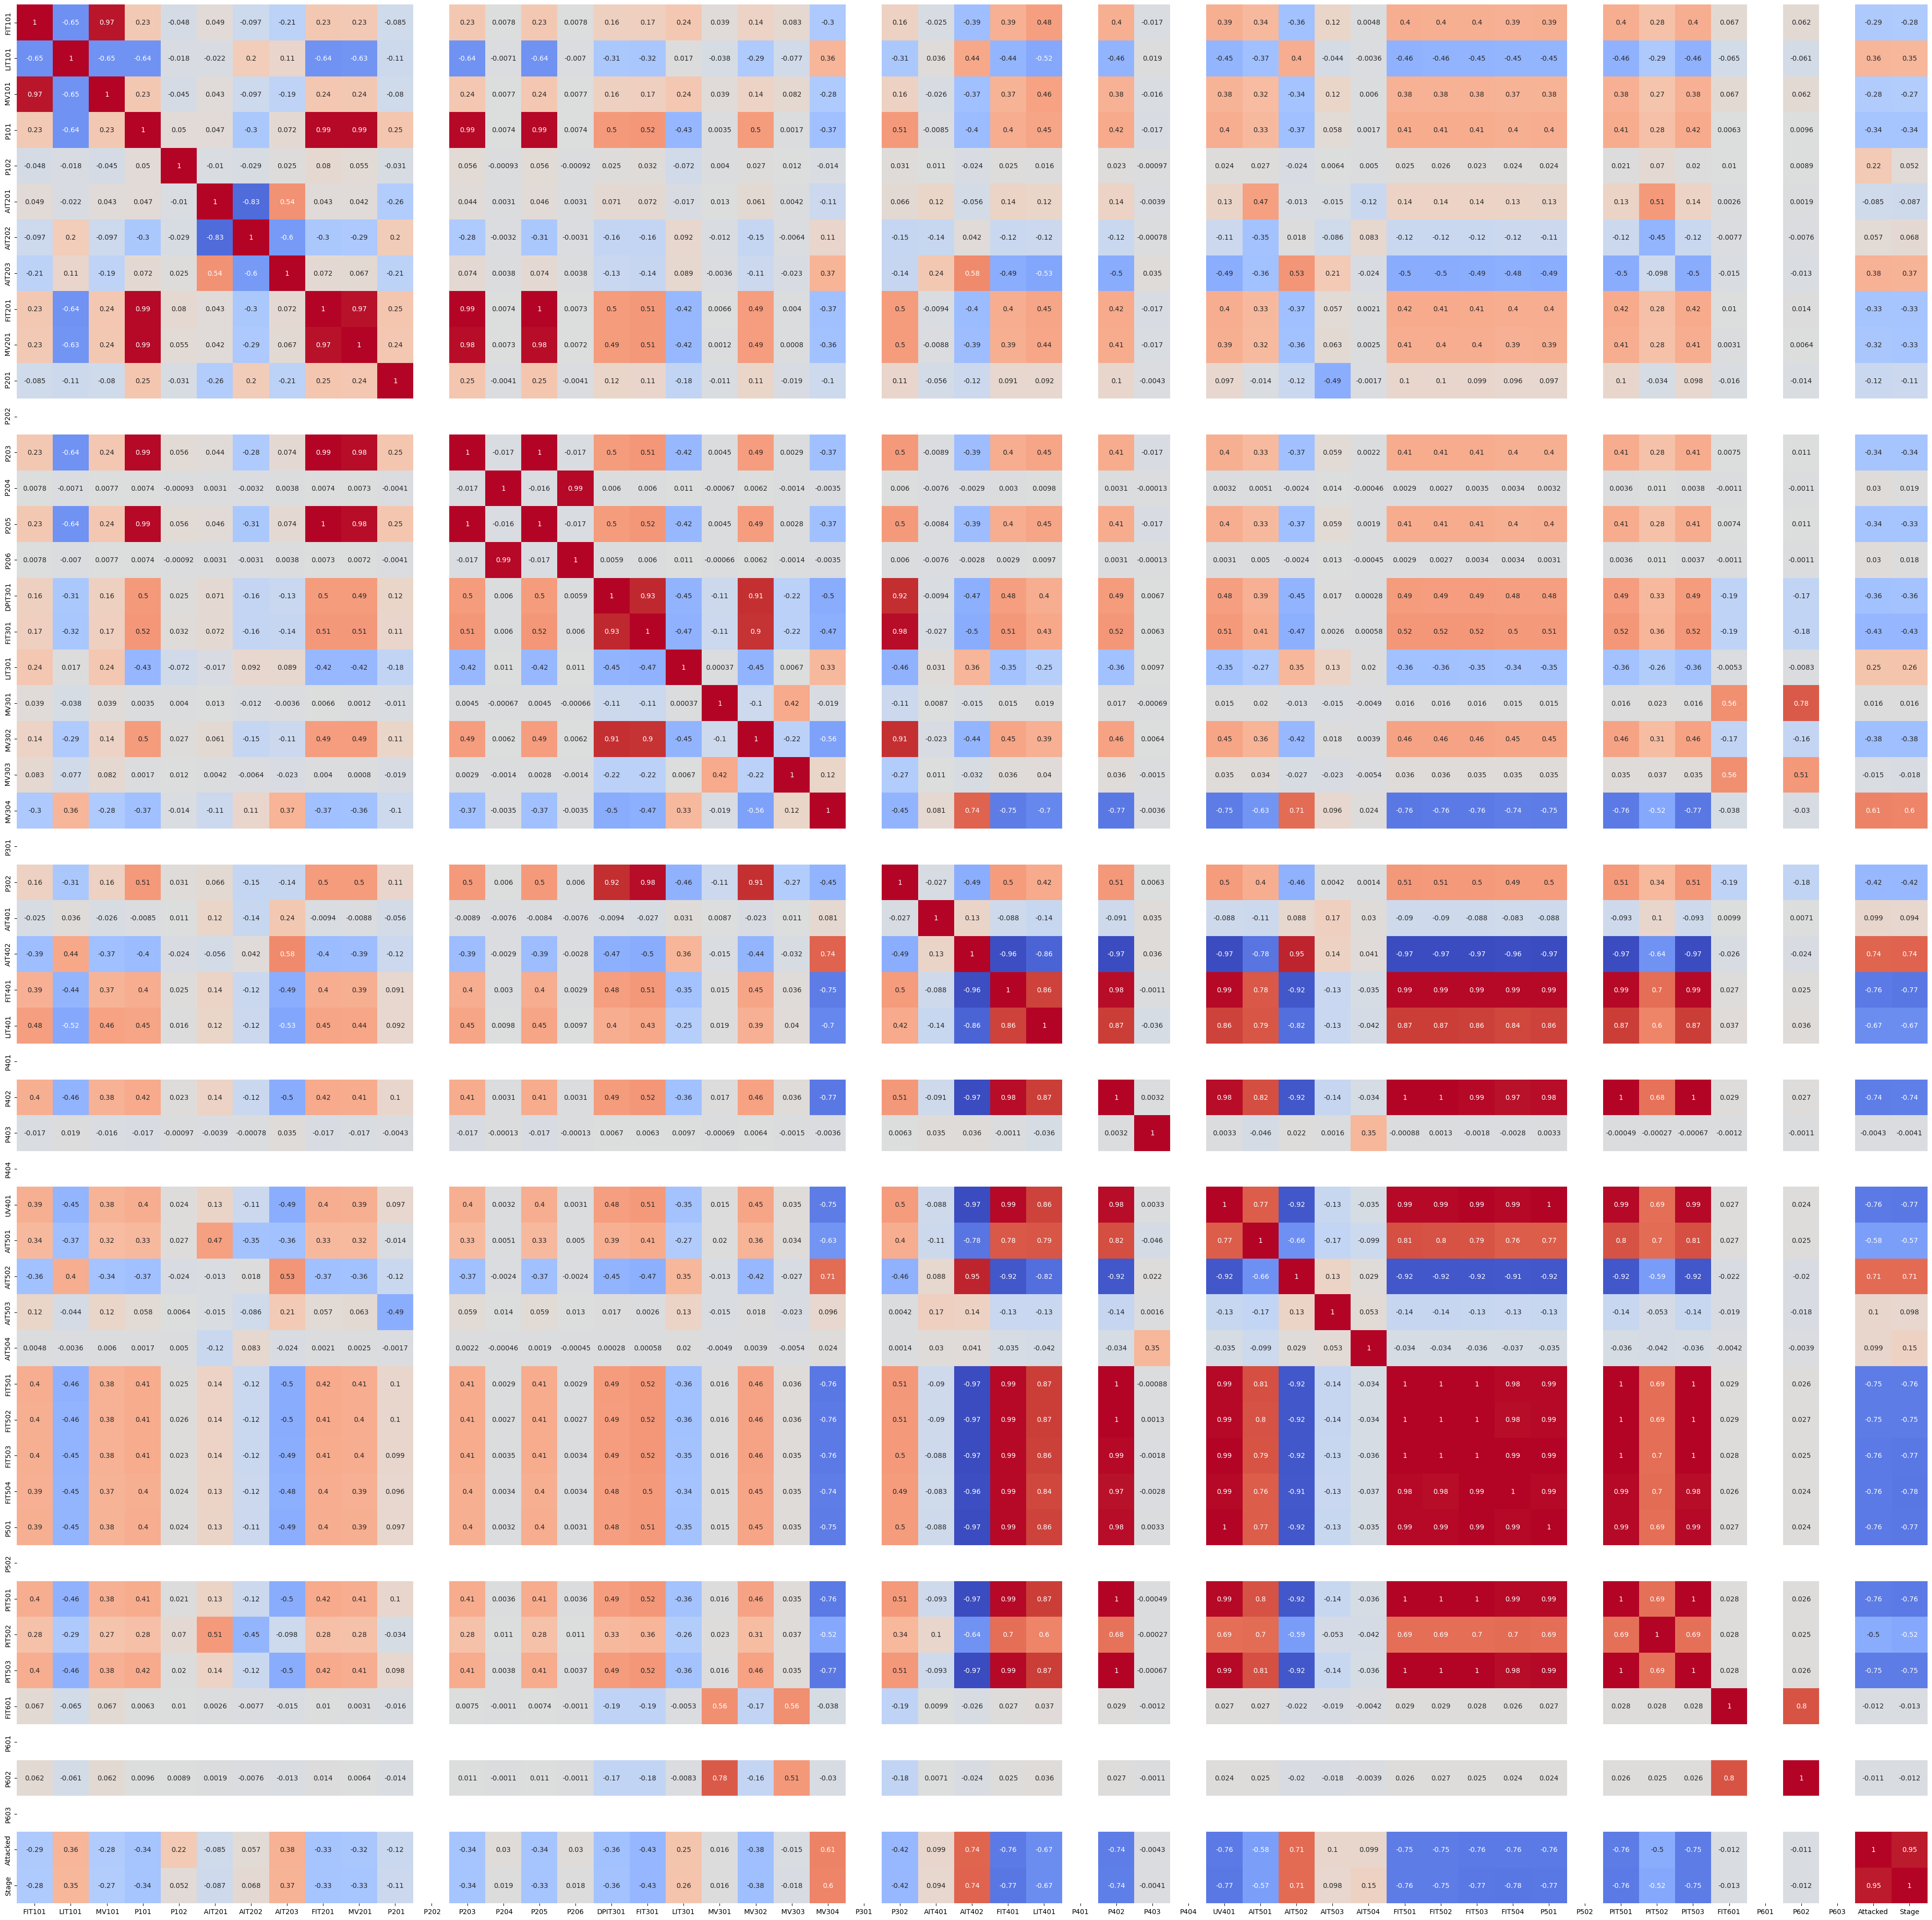

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#iris = sns.load_dataset('iris')

# Compute the correlation matrix
corr_matrix = dfs.corr()

fig,ax= plt.subplots (figsize= (50,50))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws= {'size': 10}, cbar= False, ax=ax)

# Show the plot
plt.show()

In [ ]:
dfs.corr()['Stage']

In [ ]:
#Making new datafram "dfs_corr" to include columns that have higher coorelation with the Stage column


dfs_corr = dfs[['AIT402','FIT401','LIT401','AIT502','FIT501','FIT502','FIT503','FIT504','PIT501','PIT503','Attacked','Stage' ]]
dfs_corr.head()

,AIT402,FIT401,LIT401,AIT502,FIT501,FIT502,FIT503,FIT504,PIT501,PIT503,Attacked,Stage
0,156.0882,1.713517,942.0662,145.1166,1.723789,1.279621,0.735269,0.307786,250.8652,189.5988,0,0
1,156.0882,1.715952,942.0277,145.1166,1.723789,1.297554,0.735269,0.307786,250.8652,189.6789,0,0
2,156.0882,1.715952,941.8739,145.1166,1.723404,1.293967,0.735269,0.308619,250.8812,189.6789,0,0
3,156.0882,1.714670,941.7970,145.0141,1.723404,1.281158,0.735269,0.308619,250.8812,189.6148,0,0
4,156.0882,1.714670,942.2200,144.8859,1.723404,1.281158,0.735269,0.308619,250.8812,189.5027,0,0


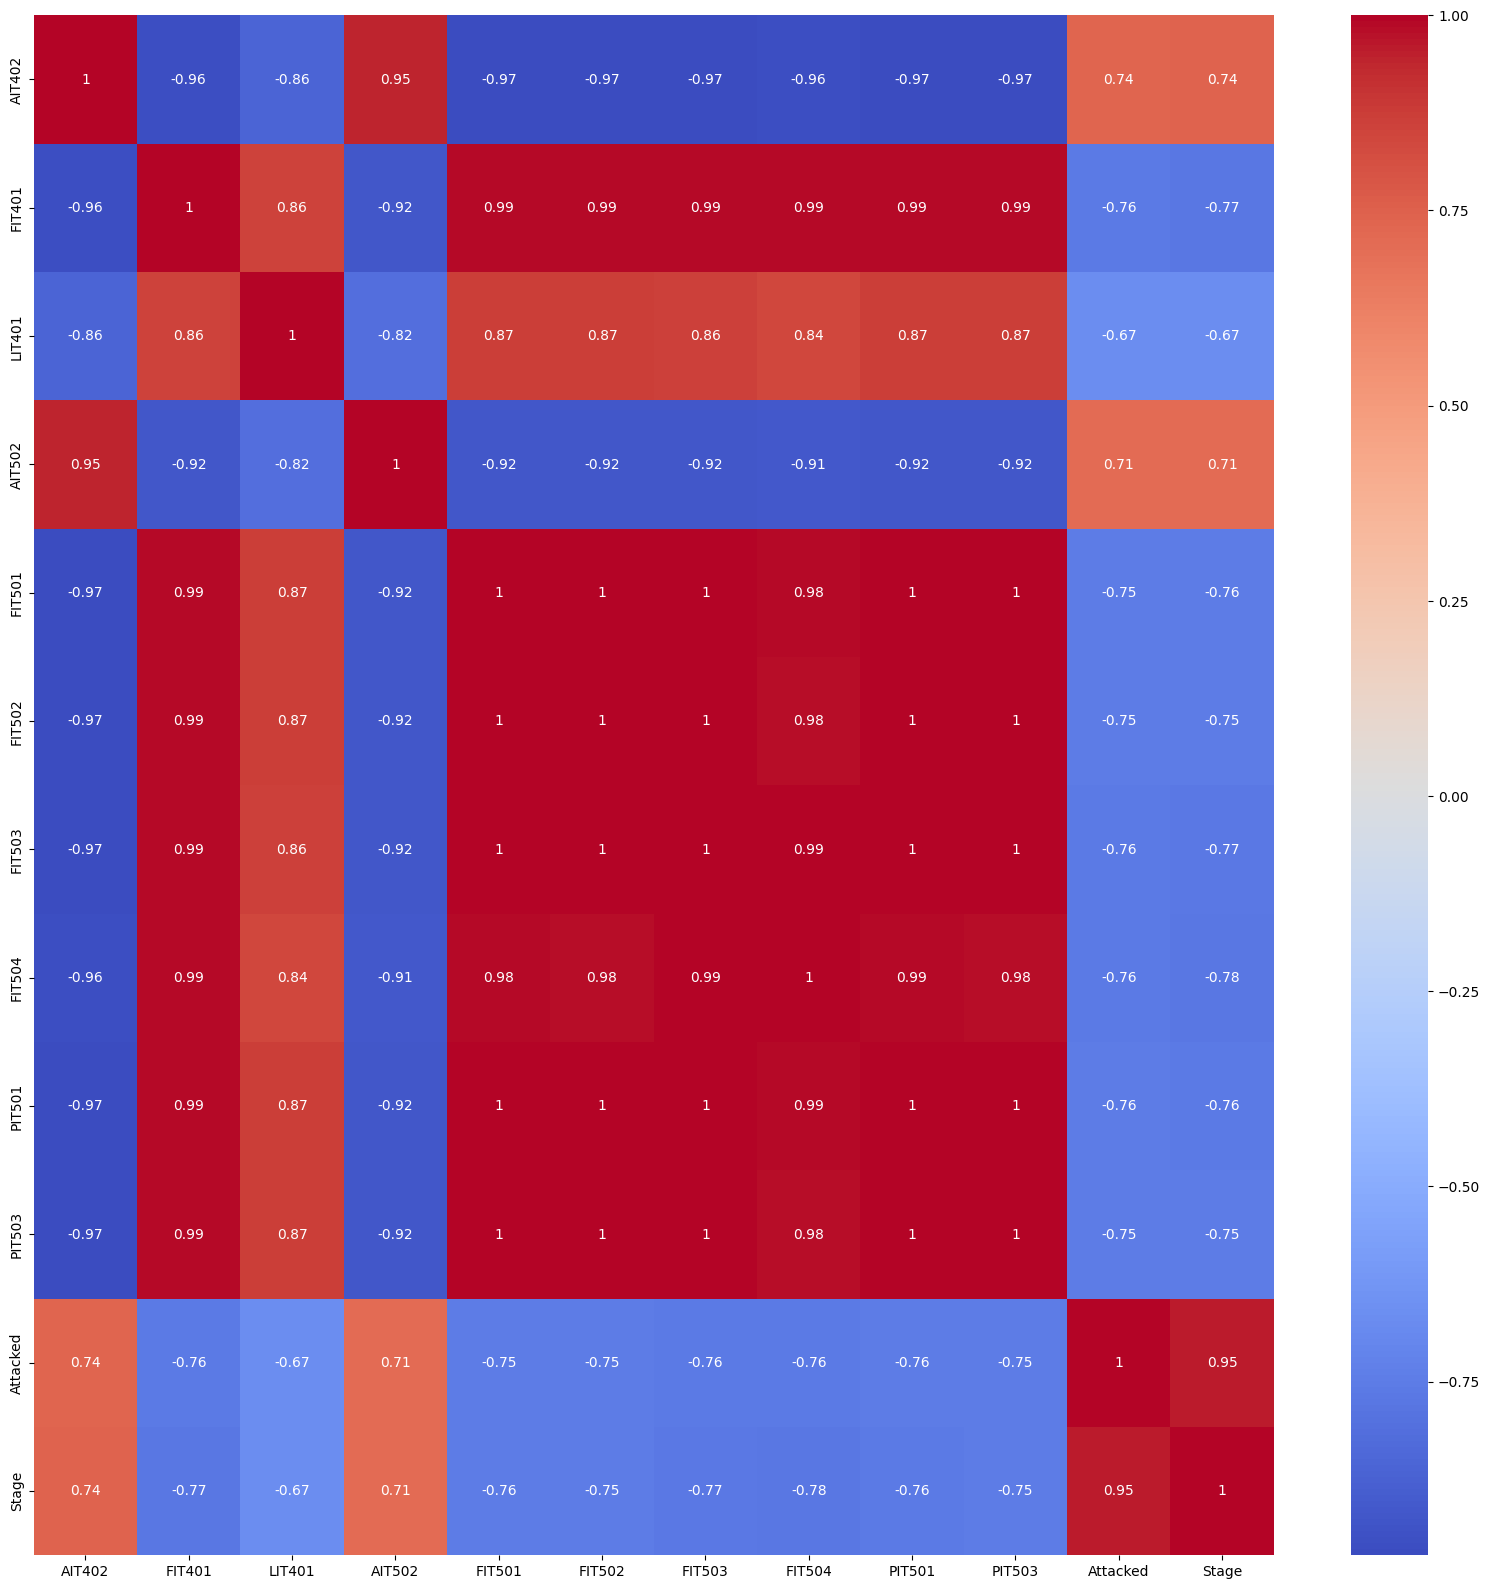

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#iris = sns.load_dataset('iris')

# Compute the correlation matrix
corr_matrix = dfs_corr.corr()

fig,ax= plt.subplots (figsize= (20,20))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws= {'size': 10}, cbar= True, ax=ax)

# Show the plot
plt.show()

In [ ]:
# Randome check
#dfs_corr.shape
dfs_corr['Stage'].value_counts()

0    395298
3     40968
1      6669
4      4370
5      1976
2       638
Name: Stage, dtype: int64

## Buckets

***Class Mis-Match problem***

we can observe a serious class mis-match issue with this dataset aswell. We have one of the class **0** with huge number of records close to 400k while the smallest records are observed for class **2** with value even less than 1k.

Below we would be following steps to overcome the class mis-match issue to make sure our models does not overfits during the training phase

In [ ]:
# Preparing bucket-1

dfs_corr_stage0 = dfs_corr.loc[dfs_corr['Stage'] == 0]

# 1- extract rows where according to each class
# 2- Duplicating them and store the data temp in a df

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 3].copy()
dfs_corr_1_s3 = sample_dfs_corr_1

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 1].copy()
dfs_corr_1_s1 = pd.concat([sample_dfs_corr_1]*5, ignore_index=True)

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 4].copy()
dfs_corr_1_s4 = pd.concat([sample_dfs_corr_1]*5, ignore_index=True)

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 5].copy()
dfs_corr_1_s5 = pd.concat([sample_dfs_corr_1]*5, ignore_index=True)

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 2].copy()
dfs_corr_1_s2 = pd.concat([sample_dfs_corr_1]*5, ignore_index=True)

# Finally adding the class 0 to the prepared bucket
dfs_corr_1_s0 = dfs_corr_stage0.iloc[1:65000]

# concatenate all these temp dataframe into 1 bucket dataframe
dfs_corr_1 = pd.concat([dfs_corr_1_s3, dfs_corr_1_s1,dfs_corr_1_s4, dfs_corr_1_s5, dfs_corr_1_s2, dfs_corr_1_s0], axis=0, ignore_index=True)

# Random shuffle of the records
dfs_corr_1 = dfs_corr_1.sample(frac=1, random_state=42)

# Bucket-1 is ready with the name 'dfs_corr_1'
dfs_corr_1.shape

(174232, 12)

In [ ]:
# Preparing bucket-2

# stage 0 is prepared while making bucket-1, therefore it is commented out below
# dfs_corr_0 = dfs_corr.loc[dfs_corr['Stage'] == 0]

# 1- extract rows where according to each class
# 2- Duplicating them and store the data temp in a df

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 3].copy()
dfs_corr_2_s3 = sample_dfs_corr_1

sample_dfs_corr_2 = dfs_corr[dfs_corr['Stage'] == 1].copy()
dfs_corr_2_s1 = pd.concat([sample_dfs_corr_2]*5, ignore_index=True)

sample_dfs_corr_2 = dfs_corr[dfs_corr['Stage'] == 4].copy()
dfs_corr_2_s4 = pd.concat([sample_dfs_corr_2]*5, ignore_index=True)

sample_dfs_corr_2 = dfs_corr[dfs_corr['Stage'] == 5].copy()
dfs_corr_2_s5 = pd.concat([sample_dfs_corr_2]*5, ignore_index=True)

sample_dfs_corr_2 = dfs_corr[dfs_corr['Stage'] == 2].copy()
dfs_corr_2_s2 = pd.concat([sample_dfs_corr_2]*5, ignore_index=True)

# Finally adding the class 0 to the prepared bucket
dfs_corr_2_s0 = dfs_corr_stage0.iloc[65001:130000]

# concatenate all these temp dataframe into 1 bucket dataframe
dfs_corr_2 = pd.concat([dfs_corr_2_s3, dfs_corr_2_s1, dfs_corr_2_s4, dfs_corr_2_s5, dfs_corr_2_s2, dfs_corr_2_s0], axis=0, ignore_index=True)

# Random shuffle of the records
dfs_corr_2 = dfs_corr_2.sample(frac=1, random_state=42)

# Bucket-2 is ready with the name 'dfs_corr_2'
dfs_corr_2.shape

(174232, 12)

In [ ]:
# Preparing bucket-3

# stage 0 is prepared while making bucket-1, therefore it is commented out below
# dfs_corr_0 = dfs_corr.loc[dfs_corr['Stage'] == 0]

# 1- extract rows where according to each class
# 2- Duplicating them and store the data temp in a df

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 3].copy()
dfs_corr_3_s3 = sample_dfs_corr_1

sample_dfs_corr_3 = dfs_corr[dfs_corr['Stage'] == 1].copy()
dfs_corr_3_s1 = pd.concat([sample_dfs_corr_3]*5, ignore_index=True)

sample_dfs_corr_3 = dfs_corr[dfs_corr['Stage'] == 4].copy()
dfs_corr_3_s4 = pd.concat([sample_dfs_corr_3]*5, ignore_index=True)

sample_dfs_corr_3 = dfs_corr[dfs_corr['Stage'] == 5].copy()
dfs_corr_3_s5 = pd.concat([sample_dfs_corr_3]*5, ignore_index=True)

sample_dfs_corr_3 = dfs_corr[dfs_corr['Stage'] == 2].copy()
dfs_corr_3_s2 = pd.concat([sample_dfs_corr_3]*5, ignore_index=True)

# Finally adding the class 0 to the prepared bucket
dfs_corr_3_s0 = dfs_corr_stage0.iloc[130001:195000]

# concatenate all these temp dataframe into 1 bucket dataframe
dfs_corr_3 = pd.concat([dfs_corr_3_s3, dfs_corr_3_s1, dfs_corr_3_s4, dfs_corr_3_s5, dfs_corr_3_s2, dfs_corr_3_s0], axis=0, ignore_index=True)

# Random shuffle of the records
dfs_corr_3 = dfs_corr_3.sample(frac=1, random_state=42)

# Bucket-3 is ready with the name 'dfs_corr_3'
dfs_corr_3.shape

(174232, 12)

In [ ]:
# Preparing bucket-4

# stage 0 is prepared while making bucket-1, therefore it is commented out below
# dfs_corr_0 = dfs_corr.loc[dfs_corr['Stage'] == 0]

# 1- extract rows where according to each class
# 2- Duplicating them and store the data temp in a df

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 3].copy()
dfs_corr_4_s3 = sample_dfs_corr_1

sample_dfs_corr_4 = dfs_corr[dfs_corr['Stage'] == 1].copy()
dfs_corr_4_s1 = pd.concat([sample_dfs_corr_4]*5, ignore_index=True)

sample_dfs_corr_4 = dfs_corr[dfs_corr['Stage'] == 4].copy()
dfs_corr_4_s4 = pd.concat([sample_dfs_corr_4]*5, ignore_index=True)

sample_dfs_corr_4 = dfs_corr[dfs_corr['Stage'] == 5].copy()
dfs_corr_4_s5 = pd.concat([sample_dfs_corr_4]*5, ignore_index=True)

sample_dfs_corr_4 = dfs_corr[dfs_corr['Stage'] == 2].copy()
dfs_corr_4_s2 = pd.concat([sample_dfs_corr_4]*5, ignore_index=True)

# Finally adding the class 0 to the prepared bucket
dfs_corr_4_s0 = dfs_corr_stage0.iloc[195001:260000]

# concatenate all these temp dataframe into 1 bucket dataframe
dfs_corr_4 = pd.concat([dfs_corr_4_s3, dfs_corr_4_s1, dfs_corr_4_s4, dfs_corr_4_s5, dfs_corr_4_s2, dfs_corr_4_s0], axis=0, ignore_index=True)

# Random shuffle of the records
dfs_corr_4 = dfs_corr_4.sample(frac=1, random_state=42)

# Bucket-4 is ready with the name 'dfs_corr_4'
dfs_corr_4.shape

(174232, 12)

In [ ]:
# Preparing bucket-5

# stage 0 is prepared while making bucket-1, therefore it is commented out below
# dfs_corr_0 = dfs_corr.loc[dfs_corr['Stage'] == 0]

# 1- extract rows where according to each class
# 2- Duplicating them and store the data temp in a df

sample_dfs_corr_1 = dfs_corr[dfs_corr['Stage'] == 3].copy()
dfs_corr_5_s3 = sample_dfs_corr_1

sample_dfs_corr_5 = dfs_corr[dfs_corr['Stage'] == 1].copy()
dfs_corr_5_s1 = pd.concat([sample_dfs_corr_5]*5, ignore_index=True)

sample_dfs_corr_5 = dfs_corr[dfs_corr['Stage'] == 4].copy()
dfs_corr_5_s4 = pd.concat([sample_dfs_corr_5]*5, ignore_index=True)

sample_dfs_corr_5 = dfs_corr[dfs_corr['Stage'] == 5].copy()
dfs_corr_5_s5 = pd.concat([sample_dfs_corr_5]*5, ignore_index=True)

sample_dfs_corr_5 = dfs_corr[dfs_corr['Stage'] == 2].copy()
dfs_corr_5_s2 = pd.concat([sample_dfs_corr_5]*5, ignore_index=True)

# Finally adding the class 0 to the prepared bucket
dfs_corr_5_s0 = dfs_corr_stage0.iloc[260001:325000]

# concatenate all these temp dataframe into 1 bucket dataframe
dfs_corr_5 = pd.concat([dfs_corr_5_s3, dfs_corr_5_s1, dfs_corr_5_s4, dfs_corr_5_s5, dfs_corr_5_s2, dfs_corr_5_s0], axis=0, ignore_index=True)

# Random shuffle of the records
dfs_corr_5 = dfs_corr_5.sample(frac=1, random_state=42)

# Bucket-5 is ready with the name 'dfs_corr_5'
dfs_corr_5.shape

(174232, 12)

In [ ]:
# Preparing bucket-6

# stage 0 is prepared while making bucket-1, therefore it is commented out below
# dfs_corr_0 = dfs_corr.loc[dfs_corr['Stage'] == 0]

# 1- extract rows where according to each class
# 2- Duplicating them and store the data temp in a df

sample_dfs_corr_6 = dfs_corr[dfs_corr['Stage'] == 3].copy()
dfs_corr_6_s3 = sample_dfs_corr_1

sample_dfs_corr_6 = dfs_corr[dfs_corr['Stage'] == 1].copy()
dfs_corr_6_s1 = pd.concat([sample_dfs_corr_6]*5, ignore_index=True)

sample_dfs_corr_6 = dfs_corr[dfs_corr['Stage'] == 4].copy()
dfs_corr_6_s4 = pd.concat([sample_dfs_corr_6]*5, ignore_index=True)

sample_dfs_corr_6 = dfs_corr[dfs_corr['Stage'] == 5].copy()
dfs_corr_6_s5 = pd.concat([sample_dfs_corr_6]*5, ignore_index=True)

sample_dfs_corr_6 = dfs_corr[dfs_corr['Stage'] == 2].copy()
dfs_corr_6_s2 = pd.concat([sample_dfs_corr_6]*5, ignore_index=True)

# Finally adding the class 0 to the prepared bucket
dfs_corr_6_s0 = dfs_corr_stage0.iloc[325001:395298]

# concatenate all these temp dataframe into 1 bucket dataframe
dfs_corr_6 = pd.concat([dfs_corr_6_s3, dfs_corr_6_s1, dfs_corr_6_s4, dfs_corr_6_s5, dfs_corr_6_s2, dfs_corr_6_s0], axis=0, ignore_index=True)

# Random shuffle of the records
dfs_corr_6 = dfs_corr_6.sample(frac=1, random_state=42)

# Bucket-6 is ready with the name 'dfs_corr_6'
dfs_corr_6.shape

(179530, 12)

Up untill now we have created 5 buckets that included enough records to over come class mis-match issue.



*   dfs_corr_1
*   dfs_corr_2
*   dfs_corr_3
*   dfs_corr_4
*   dfs_corr_5



Rough estimates of the number of records from each class can be found in the below cell

In [ ]:
# Check
dfs_corr_1['Stage'].value_counts()

0    64999
3    40968
1    33345
4    21850
5     9880
2     3190
Name: Stage, dtype: int64

In the below cells we would be training the RandomForest models on each bucket and calculating the classification report for each bucket

5 cells: Each for a one bucket at a time

## Random Forest

In [ ]:
# Preparing data for bucket-1
# Training the model for bucket-1
# Calculating and displaying evaluation matrics for bucket-1


# Splitting the bucket-1 data into independent and dependent variables
X = dfs_corr_1.iloc[:,0:11].values
y = dfs_corr_1.iloc[:,11].values

# Creating the Training and Test set from data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)

# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 30, max_depth=15, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)

y_test_categorical = to_categorical(y_test)
n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)

# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9992156112492826
MAE: 0.0007843887507174288
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19490
           1       1.00      1.00      1.00      9995
           2       1.00      1.00      1.00       946
           3       1.00      1.00      1.00     12244
           4       0.99      1.00      1.00      6643
           5       1.00      1.00      1.00      2952

    accuracy                           1.00     52270
   macro avg       1.00      1.00      1.00     52270
weighted avg       1.00      1.00      1.00     52270

AUC Score (macro): 0.9999989297533323


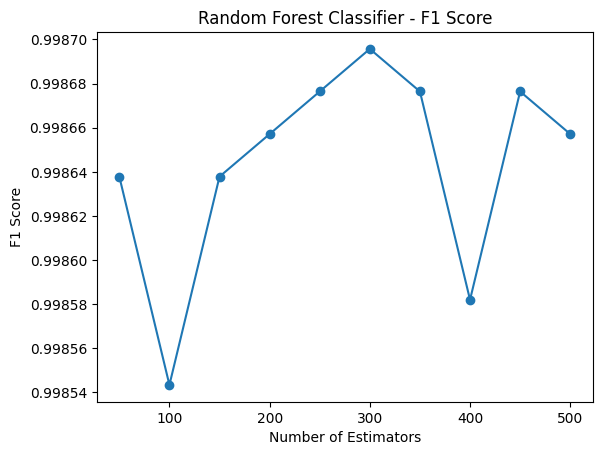

In [ ]:
# Varying number of estimators
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# F1 scores for each number of estimators
f1_scores = []
# Train the Random Forest classifier for each number of estimators
for n in n_estimators:
    # Create and train the classifier
    rf = RandomForestClassifier(n_estimators=n, random_state=42, max_depth=15)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Compute the F1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

# Plotting the F1 scores
plt.plot(n_estimators, f1_scores, marker='o')

# Add labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('Random Forest Classifier - F1 Score')

# Show the plot
plt.show()



In [ ]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities on the test set
y_probs = rf.predict_proba(X_test)
y_probs = y_probs[:, 1]  # Take probabilities of positive class

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot the precision-recall curve
plt.plot(recall, precision)

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Classifier - Precision-Recall Curve')

# Show the plot
plt.show()

In [ ]:
# Preparing data for bucket-2
# Training the model for bucket-2
# Calculating and displaying evaluation matrics for bucket-2


# Splitting the bucket-2 data into independent and dependent variables
X = dfs_corr_2.iloc[:,0:11].values
y = dfs_corr_2.iloc[:,11].values

# Creating the Training and Test set from data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(n_estimators = 30, max_depth=15, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)


# Calculate the AUC for each class
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)


y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9989907330947794
MAE: 0.0010092669052206625
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23839
           1       1.00      1.00      1.00     12007
           2       1.00      1.00      1.00      2006
           3       1.00      1.00      1.00     24700
           4       0.99      1.00      1.00      7910
           5       1.00      1.00      1.00      5831

    accuracy                           1.00     76293
   macro avg       1.00      1.00      1.00     76293
weighted avg       1.00      1.00      1.00     76293

AUC Score (macro): 0.9999995777340618


In [ ]:
# Preparing data for bucket-3
# Training the model for bucket-3
# Calculating and displaying evaluation matrics for bucket-3


# Splitting the bucket-3 data into independent and dependent variables
X = dfs_corr_3.iloc[:,0:11].values
y = dfs_corr_3.iloc[:,11].values

# Creating the Training and Test set from data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(n_estimators = 30, max_depth=15, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)


# Calculate the AUC for each class
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)


y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9988203373835083
MAE: 0.0011796626164916834
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23839
           1       1.00      1.00      1.00     12007
           2       1.00      1.00      1.00      2006
           3       1.00      1.00      1.00     24700
           4       0.99      1.00      0.99      7910
           5       1.00      1.00      1.00      5831

    accuracy                           1.00     76293
   macro avg       1.00      1.00      1.00     76293
weighted avg       1.00      1.00      1.00     76293

AUC Score (macro): 0.9999984418282862


In [ ]:
# Preparing data for bucket-4
# Training the model for bucket-4
# Calculating and displaying evaluation matrics for bucket-4


# Splitting the bucket-4 data into independent and dependent variables
X = dfs_corr_4.iloc[:,0:11].values
y = dfs_corr_4.iloc[:,11].values

# Creating the Training and Test set from data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(n_estimators = 30, max_depth=15, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)


# Calculate the AUC for each class
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)


y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9990955919940231
MAE: 0.0009044080059769573
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23839
           1       1.00      1.00      1.00     12007
           2       1.00      1.00      1.00      2006
           3       1.00      1.00      1.00     24700
           4       0.99      1.00      1.00      7910
           5       1.00      1.00      1.00      5831

    accuracy                           1.00     76293
   macro avg       1.00      1.00      1.00     76293
weighted avg       1.00      1.00      1.00     76293

AUC Score (macro): 0.9999999488169027


In [ ]:
# Preparing data for bucket-5
# Training the model for bucket-5
# Calculating and displaying evaluation matrics for bucket-5


# Splitting the bucket-5 data into independent and dependent variables
X = dfs_corr_5.iloc[:,0:11].values
y = dfs_corr_5.iloc[:,11].values

# Creating the Training and Test set from data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(n_estimators = 30, max_depth=15, criterion = 'entropy', random_state = 42)
rf_classifier.fit(X_train, y_train)


# Calculate the AUC for each class
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)


y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9988916042359414
MAE: 0.0011083957640585982
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22488
           1       1.00      1.00      1.00     12056
           2       1.00      1.00      1.00      1870
           3       1.00      1.00      1.00     24631
           4       0.99      1.00      1.00      7942
           5       1.00      1.00      1.00      5896

    accuracy                           1.00     74883
   macro avg       1.00      1.00      1.00     74883
weighted avg       1.00      1.00      1.00     74883

AUC Score (macro): 0.9999985928228027


5 buckets are trained for Random Forest model and results are displayed for each bucket separately.

Add combined details later +++++

## SVM

Next we would be doing the same on SVM models.
We have already created the buckets separately before training the data on Random Forest. For this scenario we would be using the same buckets for training SVM models.

Deatils below ++++

In [ ]:
####################    Applying PCA, Training SVM model & printing classification report for Bucket-1/6    ############################################


#Applying PCA to reduce the dimentions and speed up the process
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# transforming the dfs_corr accordingly for the PCA before training the model
dfs_corr_updated = dfs_corr_1.drop(['Stage'], axis=1)

# create PCA object with number of components required
pca = PCA(n_components=11)

# fit the data to the PCA model
pca.fit(dfs_corr_updated)

# transform the data to the first two principal components
X = pca.transform(dfs_corr_updated)

#display the output datafram
#X.shape


################################################################################################################


# Splitting the bucket-1 data into independent and dependent variables
from sklearn import svm

#X = dfs_corr_1.iloc[:,0:11].values
y = dfs_corr_1.iloc[:,11].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
#from sklearn.svm import SVC
#svm_classifier = SVC(kernel='linear')
#svm_classifier.fit(X_train, y_train)


svm_classifier = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train) # Linear Kernel


####################################################################################################################


# Predicting the Test set results
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

y_pred = svm_classifier.predict(X_test)
y_pred_prob = svm_classifier.predict_proba(X_test)

y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, svm_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9387034751915516
MAE: 0.1126352340230149
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13073
           1       0.87      1.00      0.93      6717
           2       0.48      0.29      0.37       614
           3       0.98      0.87      0.92      8109
           4       0.86      0.96      0.90      4433
           5       0.93      0.78      0.85      1901

    accuracy                           0.94     34847
   macro avg       0.85      0.82      0.83     34847
weighted avg       0.94      0.94      0.94     34847

AUC Score (macro): 0.9663728373398374


In [ ]:
####################    Applying PCA, Training SVM model & printing classification report for Bucket - 2/6    ############################################


#Applying PCA to reduce the dimentions and speed up the process
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# transforming the dfs_corr accordingly for the PCA before training the model
dfs_corr_updated = dfs_corr_2.drop(['Stage'], axis=1)

# create PCA object with number of components required
pca = PCA(n_components=11)

# fit the data to the PCA model
pca.fit(dfs_corr_updated)

# transform the data to the first two principal components
X = pca.transform(dfs_corr_updated)

#display the output datafram
#X.shape


################################################################################################################


# Splitting the bucket-1 data into independent and dependent variables
from sklearn import svm

#X = dfs_corr_2.iloc[:,0:11].values
y = dfs_corr_2.iloc[:,11].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
#from sklearn.svm import SVC
#svm_classifier = SVC(kernel='linear')
#svm_classifier.fit(X_train, y_train)


svm_classifier = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train) # Linear Kernel


####################################################################################################################


# Predicting the Test set results
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

y_pred = svm_classifier.predict(X_test)
y_pred_prob = svm_classifier.predict_proba(X_test)

y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, svm_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9387034751915516
MAE: 0.1126352340230149
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13073
           1       0.87      1.00      0.93      6717
           2       0.48      0.29      0.37       614
           3       0.98      0.87      0.92      8109
           4       0.86      0.96      0.90      4433
           5       0.93      0.78      0.85      1901

    accuracy                           0.94     34847
   macro avg       0.85      0.82      0.83     34847
weighted avg       0.94      0.94      0.94     34847

AUC Score (macro): 0.9663964752309422


In [ ]:
####################    Applying PCA, Training SVM model & printing classification report for Bucket - 3/6    ############################################


#Applying PCA to reduce the dimentions and speed up the process
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# transforming the dfs_corr accordingly for the PCA before training the model
dfs_corr_updated = dfs_corr_3.drop(['Stage'], axis=1)

# create PCA object with number of components required
pca = PCA(n_components=11)

# fit the data to the PCA model
pca.fit(dfs_corr_updated)

# transform the data to the first two principal components
X = pca.transform(dfs_corr_updated)

#display the output datafram
#X.shape


################################################################################################################


# Splitting the bucket-1 data into independent and dependent variables
from sklearn import svm

#X = dfs_corr_3.iloc[:,0:11].values
y = dfs_corr_3.iloc[:,11].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
#from sklearn.svm import SVC
#svm_classifier = SVC(kernel='linear')
#svm_classifier.fit(X_train, y_train)


svm_classifier = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train) # Linear Kernel


####################################################################################################################


# Predicting the Test set results
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

y_pred = svm_classifier.predict(X_test)
y_pred_prob = svm_classifier.predict_proba(X_test)

y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, svm_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9386747783166414
MAE: 0.11275002152265619
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13073
           1       0.87      1.00      0.93      6717
           2       0.48      0.29      0.37       614
           3       0.98      0.87      0.92      8109
           4       0.86      0.96      0.90      4433
           5       0.93      0.77      0.85      1901

    accuracy                           0.94     34847
   macro avg       0.85      0.82      0.83     34847
weighted avg       0.94      0.94      0.94     34847

AUC Score (macro): 0.9663876622976925


In [ ]:
####################    Applying PCA, Training SVM model & printing classification report for Bucket - 4/6    ############################################


#Applying PCA to reduce the dimentions and speed up the process
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# transforming the dfs_corr accordingly for the PCA before training the model
dfs_corr_updated = dfs_corr_4.drop(['Stage'], axis=1)

# create PCA object with number of components required
pca = PCA(n_components=11)

# fit the data to the PCA model
pca.fit(dfs_corr_updated)

# transform the data to the first two principal components
X = pca.transform(dfs_corr_updated)

#display the output datafram
#X.shape


################################################################################################################


# Splitting the bucket-1 data into independent and dependent variables
from sklearn import svm

#X = dfs_corr_4.iloc[:,0:11].values
y = dfs_corr_4.iloc[:,11].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
#from sklearn.svm import SVC
#svm_classifier = SVC(kernel='linear')
#svm_classifier.fit(X_train, y_train)


svm_classifier = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train) # Linear Kernel


####################################################################################################################


# Predicting the Test set results
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

y_pred = svm_classifier.predict(X_test)
y_pred_prob = svm_classifier.predict_proba(X_test)

y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, svm_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9386173845668206
MAE: 0.11280741527247683
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13073
           1       0.87      1.00      0.93      6717
           2       0.49      0.29      0.37       614
           3       0.98      0.87      0.92      8109
           4       0.85      0.96      0.90      4433
           5       0.93      0.77      0.85      1901

    accuracy                           0.94     34847
   macro avg       0.85      0.82      0.83     34847
weighted avg       0.94      0.94      0.94     34847

AUC Score (macro): 0.9663281634211074


In [ ]:
####################    Applying PCA, Training SVM model & printing classification report for Bucket - 5/6    ############################################


#Applying PCA to reduce the dimentions and speed up the process
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# transforming the dfs_corr accordingly for the PCA before training the model
dfs_corr_updated = dfs_corr_5.drop(['Stage'], axis=1)

# create PCA object with number of components required
pca = PCA(n_components=11)

# fit the data to the PCA model
pca.fit(dfs_corr_updated)

# transform the data to the first two principal components
X = pca.transform(dfs_corr_updated)

#display the output datafram
#X.shape


################################################################################################################


# Splitting the bucket-1 data into independent and dependent variables
from sklearn import svm

#X = dfs_corr_5.iloc[:,0:11].values
y = dfs_corr_5.iloc[:,11].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
#from sklearn.svm import SVC
#svm_classifier = SVC(kernel='linear')
#svm_classifier.fit(X_train, y_train)


svm_classifier = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train) # Linear Kernel


####################################################################################################################


# Predicting the Test set results
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

y_pred = svm_classifier.predict(X_test)
y_pred_prob = svm_classifier.predict_proba(X_test)

y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, svm_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9387034751915516
MAE: 0.11272132464774585
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13073
           1       0.87      1.00      0.93      6717
           2       0.48      0.29      0.37       614
           3       0.98      0.87      0.92      8109
           4       0.86      0.96      0.90      4433
           5       0.93      0.77      0.85      1901

    accuracy                           0.94     34847
   macro avg       0.85      0.82      0.83     34847
weighted avg       0.94      0.94      0.94     34847

AUC Score (macro): 0.9664338536922801


In [ ]:
####################    Applying PCA, Training SVM model & printing classification report for Bucket - 6/6    ############################################


#Applying PCA to reduce the dimentions and speed up the process
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# transforming the dfs_corr accordingly for the PCA before training the model
dfs_corr_updated = dfs_corr_6.drop(['Stage'], axis=1)

# create PCA object with number of components required
pca = PCA(n_components=11)

# fit the data to the PCA model
pca.fit(dfs_corr_updated)

# transform the data to the first two principal components
X = pca.transform(dfs_corr_updated)

#display the output datafram
#X.shape


################################################################################################################


# Splitting the bucket-1 data into independent and dependent variables
from sklearn import svm

#X = dfs_corr_6.iloc[:,0:11].values
y = dfs_corr_6.iloc[:,11].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
#from sklearn.svm import SVC
#svm_classifier = SVC(kernel='linear')
#svm_classifier.fit(X_train, y_train)


svm_classifier = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train) # Linear Kernel


####################################################################################################################


# Predicting the Test set results
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.utils import to_categorical
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

y_pred = svm_classifier.predict(X_test)
y_pred_prob = svm_classifier.predict_proba(X_test)

y_test_categorical = to_categorical(y_test)
#, num_classes=6

n_classes = 6
aucs = []
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])
    aucs.append(auc)


# Calculate evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (macro):", roc_auc_score(y_test, svm_classifier.predict_proba(X_test), multi_class='ovo', average='macro'))

Accuracy Score: 0.9312371191444326
MAE: 0.12209658552888096
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14072
           1       0.86      1.00      0.92      6685
           2       0.50      0.29      0.37       634
           3       0.99      0.83      0.90      8232
           4       0.81      0.97      0.88      4335
           5       0.93      0.76      0.83      1948

    accuracy                           0.93     35906
   macro avg       0.85      0.81      0.82     35906
weighted avg       0.93      0.93      0.93     35906

AUC Score (macro): 0.9646478924141813


We have concluded that training of 6 buckets on SVM and classification report of each bucket is available separately.

***Accuracy & MAE on SVM for 6 buckets are as follow:***

**Bucket-1**

Accuracy Score: 0.9387034751915516

MAE: 0.1126352340230149

**Bucket-2**

Accuracy Score: 0.9387034751915516

MAE: 0.1126352340230149

**Bucket-3**

Accuracy Score: 0.9386747783166414

MAE: 0.11275002152265619

**Bucket-4**

Accuracy Score: 0.9386173845668206

MAE: 0.11280741527247683

**Bucket-5**

Accuracy Score: 0.9387034751915516

MAE: 0.11272132464774585

**Bucket-6**

Accuracy Score: 0.9312371191444326

MAE: 0.12209658552888096

In [ ]:
# Randome check
X.shape

svm_clf = svm.SVC(kernel='linear').fit(x_train1, y_train1) # Linear Kernel

(449919, 11)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Neural Network

For Neural Nets, data has to be transformed accordingly.

First thing is the class imbalance wneed to deal with.

In [ ]:
# Preparing bucket for Neural Network


In [ ]:
dfs_corr_1_nn['Stage'].value_counts()

0    395298
3    204840
1     66690
4     43700
5     39520
2     12760
Name: Stage, dtype: int64

In [ ]:
#Creating a Neural Net (Bucket1)


# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train1, y_train1, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the training data
train_preds = model.predict(x_train1)
train_preds = [1 if y >= 0.85 else 0 for y in train_preds]

# Predict on the test data
test_preds = model.predict(df_test_x)
test_preds = [1 if y >= 0.85 else 0 for y in test_preds]

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(df_test_x, y_test)

# Calculate the mean absolute error for the training and test sets
train_mae = mean_absolute_error(y_train1, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

# Calculate the F1 score for the training and test sets
train_f1 = f1_score(y_train1, train_preds)
test_f1 = f1_score(y_test, test_preds)

#Display the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

In [ ]:
dfs_corr_1['Stage'].value_counts()

0    64999
3    40968
1    33345
4    21850
5     9880
2     3190
Name: Stage, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Load data
# data = pd.read_csv('data.csv')

# Split data into features/target. Also converting them to numpy array
X = dfs_corr.iloc[:,0:11].values
y = dfs_corr.iloc[:,11].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

# Compute classification report
report = classification_report(y_test, y_pred_classes)
print(report)

Epoch 1/10
10124/10124 [==============================] - 33s 3ms/step - loss: -1051126.2500 - accuracy: 0.7260 - val_loss: -3721902.0000 - val_accuracy: 0.7625
Epoch 2/10
10124/10124 [==============================] - 28s 3ms/step - loss: -11493463.0000 - accuracy: 0.7291 - val_loss: -22312054.0000 - val_accuracy: 0.7570
Epoch 3/10
10124/10124 [==============================] - 28s 3ms/step - loss: -42898740.0000 - accuracy: 0.7290 - val_loss: -67669752.0000 - val_accuracy: 0.7256
Epoch 4/10
10124/10124 [==============================] - 26s 3ms/step - loss: -107154568.0000 - accuracy: 0.7290 - val_loss: -151214192.0000 - val_accuracy: 0.7052
Epoch 5/10
10124/10124 [==============================] - 29s 3ms/step - loss: -215377744.0000 - accuracy: 0.7287 - val_loss: -282984736.0000 - val_accuracy: 0.7248
Epoch 6/10
10124/10124 [==============================] - 26s 3ms/step - loss: -378776608.0000 - accuracy: 0.7287 - val_loss: -474738496.0000 - val_accuracy: 0.7210
Epoch 7/10
10124/1

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


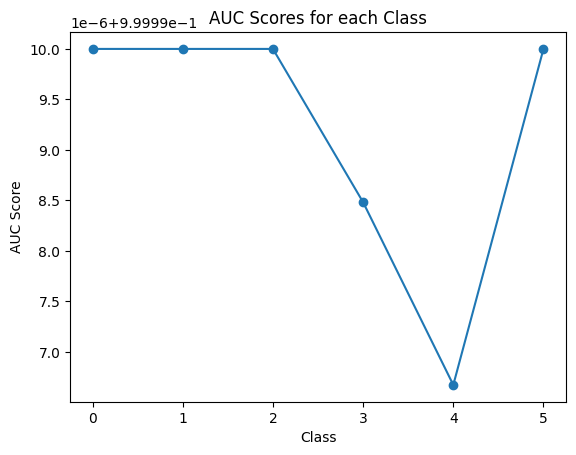

In [ ]:
# assuming you have calculated the AUC scores for each class and stored them in a list called aucs
plt.plot(range(len(aucs)), aucs, marker='o')
plt.xticks(range(len(aucs)))
plt.xlabel('Class')
plt.ylabel('AUC Score')
plt.title('AUC Scores for each Class')
plt.show()